In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, scale
from matplotlib.colors import Normalize
plt.style.use('./plotstyle.mplstyle')

In [2]:
def y1(x, a, mu, nu, xscale=1, tscale=1.e10):
    x = x/xscale
    a = a / (xscale / (tscale * xscale**-nu) )
    a_power = x**(1-mu) - a * (1-mu) * x**-nu
    a = a_power**(1/(1-mu)) * xscale
    return a

In [ ]:
def variable_nu(m, slope=0.005):
    m0 = 20
    m1 = 100
    nu0 = 1
    nu1 = 0.6
    
    c = (m0 + m1)/2
    
    nu = nu1 + (nu0 - nu1) / (1 + np.exp(slope * (m-c)))
    return nu

def tms(m, nu_lambda=0.1):
    nu = variable_nu(m, slope=nu_lambda)
    return 6e6 * (m/20)**-nu

SyntaxError: invalid syntax (838720541.py, line 9)

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


Text(0, 0.5, '$\\nu$')

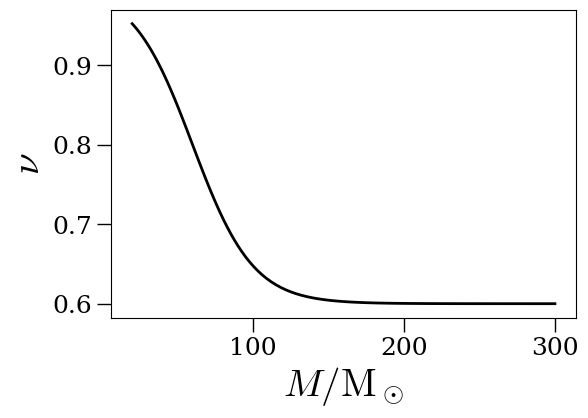

In [ ]:
nu_lambda = 0.05

fig, ax = plt.subplots(figsize=(6, 4))

plot_x = np.logspace(np.log10(20), np.log10(300), 100)
ax.plot(plot_x, variable_nu(plot_x, slope=nu_lambda), label='tms', color='black')
ax.set_xlabel('$M/\\mathrm{M}_\\odot$')
ax.set_ylabel('$\\nu$')


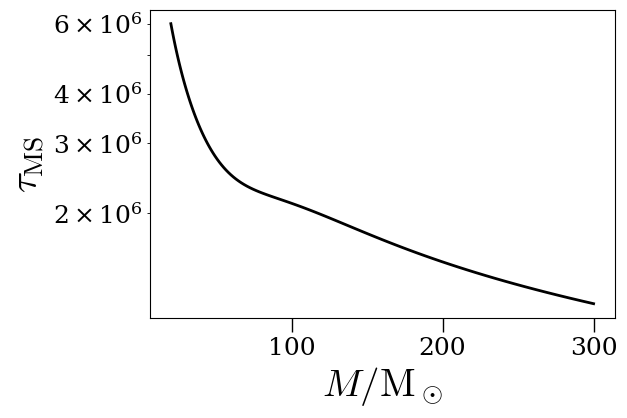

In [ ]:
nu_lambda = 0.05

fig, ax = plt.subplots(figsize=(6, 4))

plot_x = np.logspace(np.log10(20), np.log10(300), 100)
ax.plot(plot_x, tms(plot_x, nu_lambda), label='tms', color='black')
ax.set_xlabel('$M/\\mathrm{M}_\\odot$')
ax.set_ylabel('$\\tau_\\mathrm{MS}$')
ax.set_yscale('log')


Text(0.5, 0, '$m_\\mathrm{i}$')

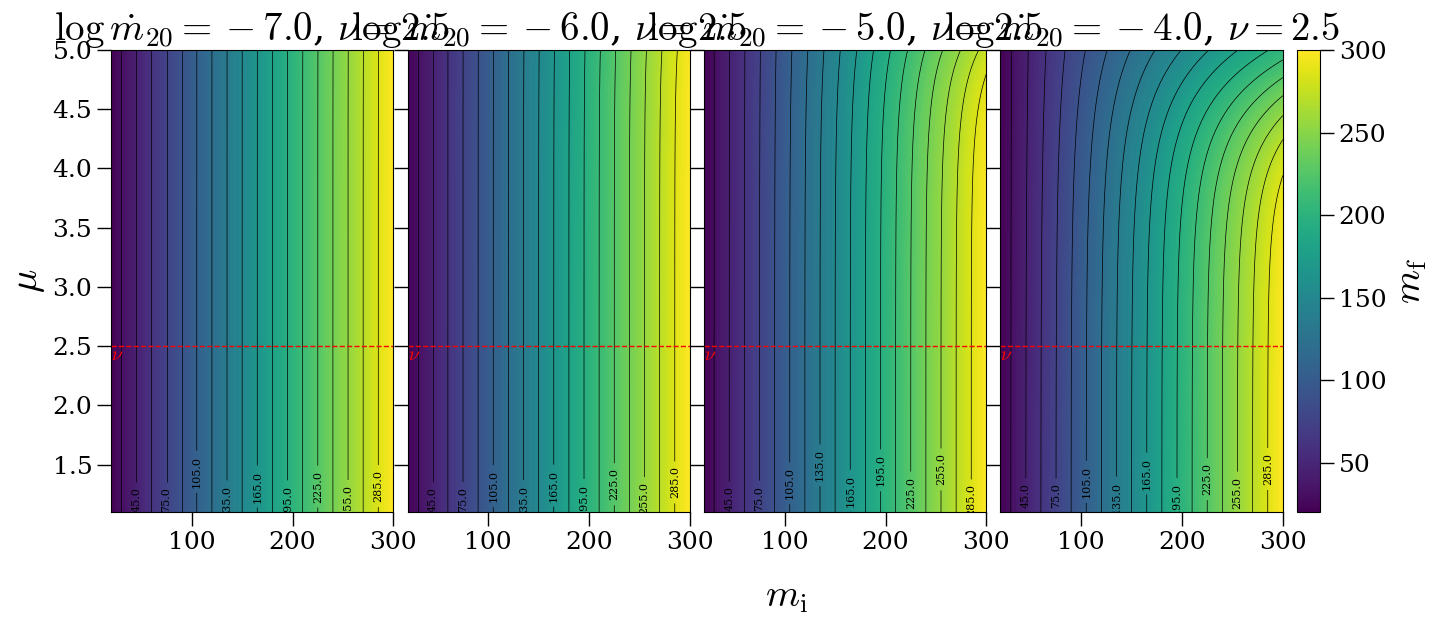

In [ ]:
# Define parameters
nu = 2.5
xscale = 20
tscale = 6.e6

# a is the mass loss rate for m = xscale
a_list = 10.**np.arange(-7, -3, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(1.1, 5, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 20
ymax = 300

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = y1(X, a, MU, nu, xscale=xscale, tscale=tscale)
    contour = ax.contourf(X, MU, Y1, levels=100, cmap=cm.viridis, vmin=ymin, vmax=ymax)
    contour_lines = ax.contour(X, MU, Y1, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{m}}_{{20}}={np.log10(a)}$, $\\nu={nu}$')
    ax.set_xlim(20, 300)
    ax.hlines(nu, 20, 300, color='red', linestyle='--', lw=1)
    ax.text(20, nu, '$\\nu$', color='red', fontsize=14, ha='left', va='top')

sm = cm.ScalarMappable(Normalize(vmin=ymin, vmax=ymax), cmap=cm.viridis)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$m_\\mathrm{f}$')

axes[0].set_ylabel('$\mu$')
fig.text(0.5, 0, '$m_\\mathrm{i}$', ha='center', va='top', transform=fig.transFigure)

Text(0.5, 0, '$m_\\mathrm{i}$')

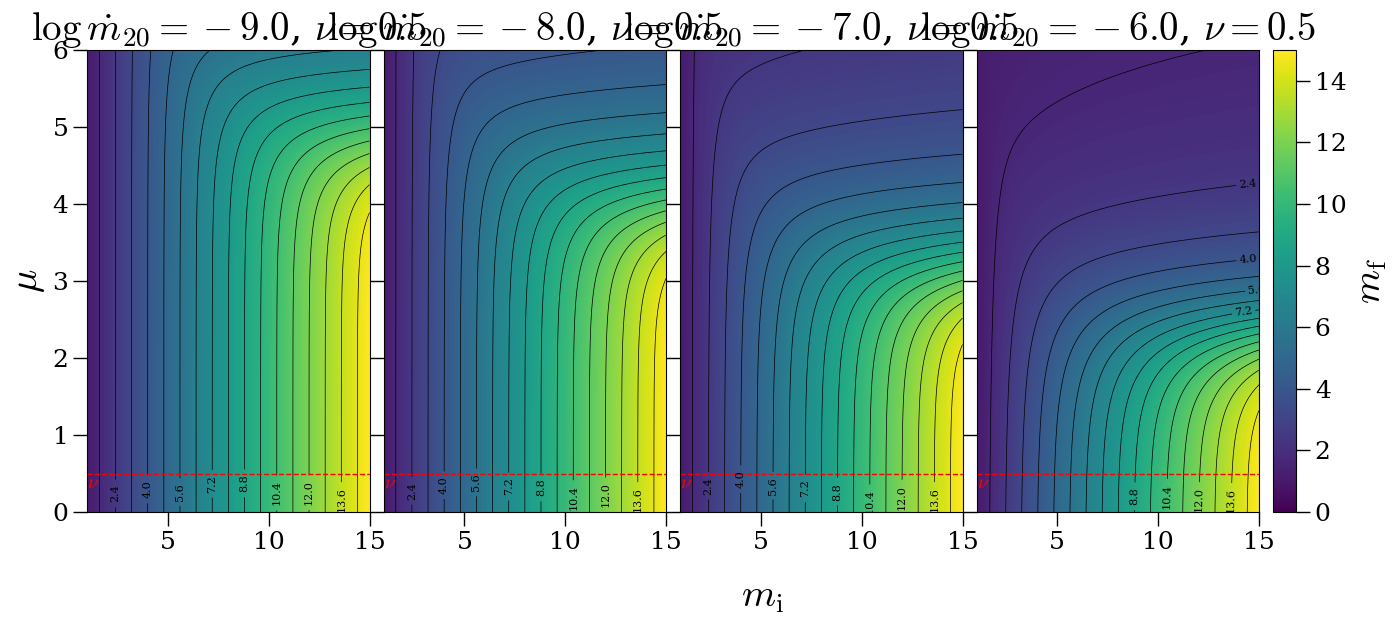

In [7]:
# Define parameters
nu = 0.5
xscale = 20
tscale = 6.e6
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
a_list = 10.**np.arange(-9, -5, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(0, 6, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = y1(X, a, MU, nu, xscale=xscale, tscale=tscale)/plot_xscale
    contour = ax.contourf(X/plot_xscale, MU, Y1, levels=200, cmap=cmap, vmin=ymin/plot_xscale, vmax=ymax/plot_xscale)
    contour_lines = ax.contour(X/plot_xscale, MU, Y1, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{m}}_{{20}}={np.log10(a)}$, $\\nu={nu}$')
    ax.set_xlim(20/plot_xscale, 300/plot_xscale)
    ax.hlines(nu, 20/plot_xscale, 300/plot_xscale, color='red', linestyle='--', lw=1)
    ax.text(20/plot_xscale, nu, '$\\nu$', color='red', fontsize=14, ha='left', va='top')

sm = cm.ScalarMappable(Normalize(vmin=ymin/plot_xscale, vmax=ymax/plot_xscale), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$m_\\mathrm{f}$')

axes[0].set_ylabel('$\mu$')
fig.text(0.5, 0, '$m_\\mathrm{i}$', ha='center', va='top', transform=fig.transFigure)

In [4]:
def mi_linear_upper_limit(alpha, beta, mdot_r, qlim, xscale=1., tscale=1.e10):
    mdot_r = mdot_r / (xscale / (tscale * xscale**-alpha) )
    logmi = (
        np.log10(qlim**(-(beta - 1)) - 1)
        - np.log10(alpha * mdot_r)
    ) / (beta - (a + 1))
    return 10.**logmi

(1.0, 4.0)

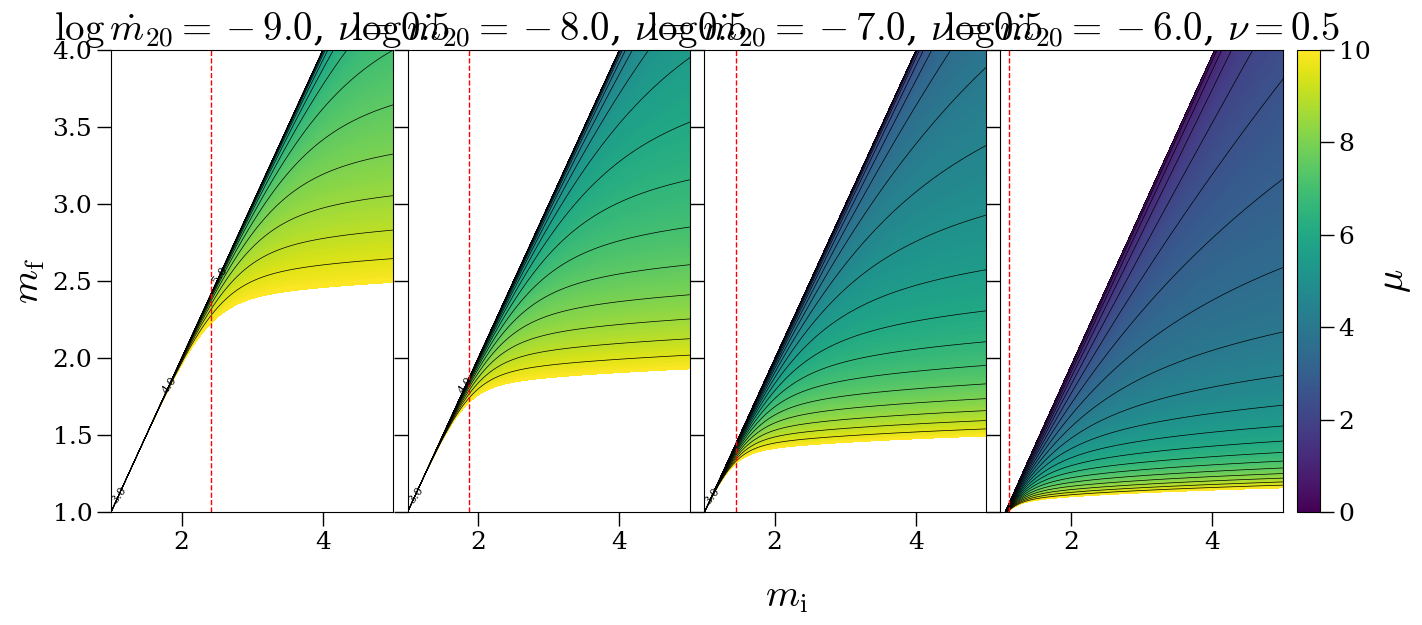

In [9]:

# Define parameters
linear_regime_min_derivative = 0.99

nu = 0.5
xscale = 20
tscale = 6.e6
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 0
max_mu = 10

a_list = 10.**np.arange(-9, -5, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = y1(X, a, MU, nu, xscale=xscale, tscale=tscale)/plot_xscale
    contour = ax.contourf(X/plot_xscale, Y1, MU, levels=200, cmap=cmap, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(X/plot_xscale, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{m}}_{{20}}={np.log10(a)}$, $\\nu={nu}$')
    ax.set_xlim(20/plot_xscale, 300/plot_xscale)
    #ax.hlines(nu, 20/plot_xscale, 300/plot_xscale, color='red', linestyle='--', lw=1)
    #ax.text(20/plot_xscale, nu, '$\\nu$', color='red', fontsize=14, ha='left', va='top')
    
    limit1 = mi_linear_upper_limit(nu, max(mu), a, qlim=linear_regime_min_derivative, xscale=xscale, tscale=tscale)
    ax.vlines(limit1, 1, 15, color='red', linestyle='--', lw=1)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$m_\\mathrm{f}$')
fig.text(0.5, 0, '$m_\\mathrm{i}$', ha='center', va='top', transform=fig.transFigure)
ax.set_xlim(1, 5)
ax.set_ylim(1, 4)

Text(0.5, 0, '$M_\\mathrm{i}/\\mathrm{M}_\\odot$')

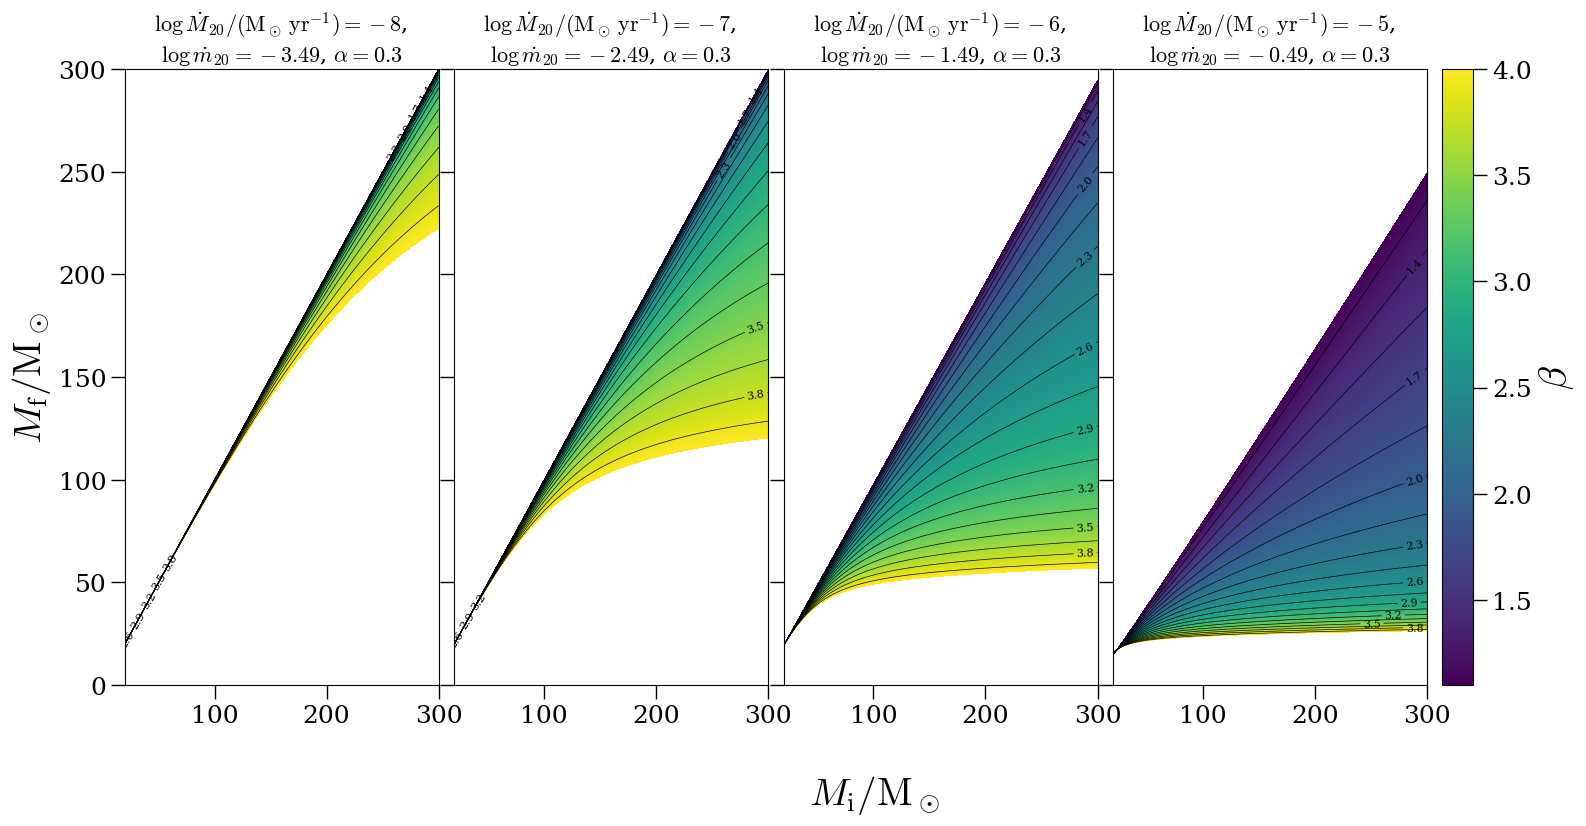

In [10]:

# Define parameters
linear_regime_min_derivative = 0.99

nu = 0.3
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4

a_list = 10.**np.arange(-8, -4, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = y1(X, a, MU, nu, xscale=xscale, tscale=tscale)
    contour = ax.contourf(X, Y1, MU, levels=200, cmap=cmap, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(X, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)
    ax.set_xlim(20, 300)
    ax.set_ylim(0, 300)
    #ax.hlines(nu, 20/plot_xscale, 300/plot_xscale, color='red', linestyle='--', lw=1)
    #ax.text(20/plot_xscale, nu, '$\\nu$', color='red', fontsize=14, ha='left', va='top')
    
    limit1 = mi_linear_upper_limit(nu, max(mu), a, qlim=linear_regime_min_derivative, xscale=xscale, tscale=tscale)
    ax.vlines(limit1, 1, 15, color='red', linestyle='--', lw=1)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\beta$')

axes[0].set_ylabel('$M_\\mathrm{f}/\\mathrm{M}_\\odot$')
fig.text(0.5, 0, '$M_\\mathrm{i}/\\mathrm{M}_\\odot$', ha='center', va='top', transform=fig.transFigure)
#ax.set_xlim(1, 15)
#ax.set_ylim(1, 15)

In [5]:
def mf(mi, mr, alpha, beta, xscale=1., tscale=1.e10):
    return y1(mi, mr, beta, alpha, xscale=xscale, tscale=tscale)

In [6]:
def mider_mf(mi, mr, alpha, beta, xscale=1., tscale=1.e10):
    _mf = mf(mi, mr, alpha, beta, xscale=xscale, tscale=tscale)/xscale
    _mi = mi/xscale
    mr = mr / (xscale / (tscale * xscale**-alpha) )
    q = _mf/_mi
    der = (1 + alpha * mr * _mi**(beta - (alpha+1))) * q**beta
    return der

In [7]:
def rel_width(mi0, mi1, mr, alpha, beta, xscale=1., tscale=1.e10):
    return (mf(mi1, mr, alpha, beta, xscale=xscale, tscale=tscale) - mf(mi0, mr, alpha, beta, xscale=xscale, tscale=tscale)) / (mi1 - mi0)

Text(0.5, 0, '$m_i$')

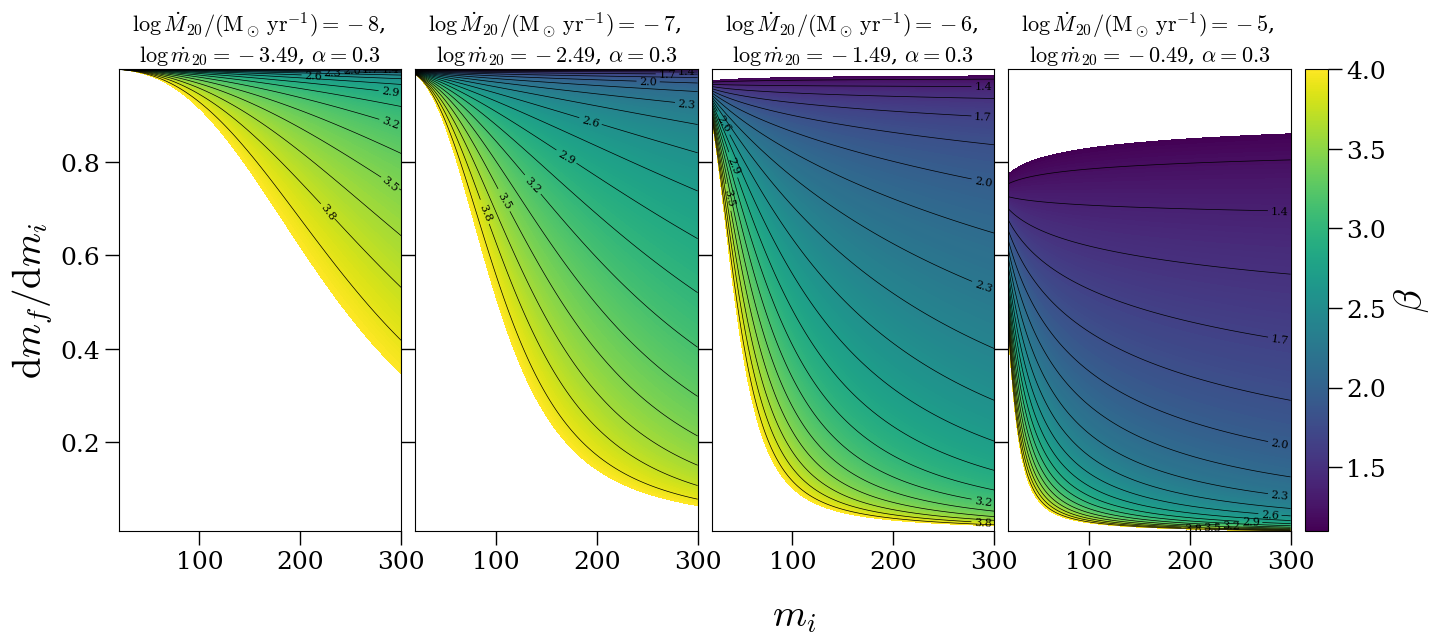

In [14]:
nu = 0.3
xscale = 20
tscale =10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4

a_list = 10.**np.arange(-8, -4, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(X, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(X, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\beta$')

axes[0].set_ylabel('$\\mathrm{d} m_f/\\mathrm{d} m_i$')
fig.text(0.5, 0, '$m_i$', ha='center', va='top', transform=fig.transFigure)
#ax.set_xlim(1, 15)
#ax.set_ylim(0,1)

#ax.set_yscale('log')

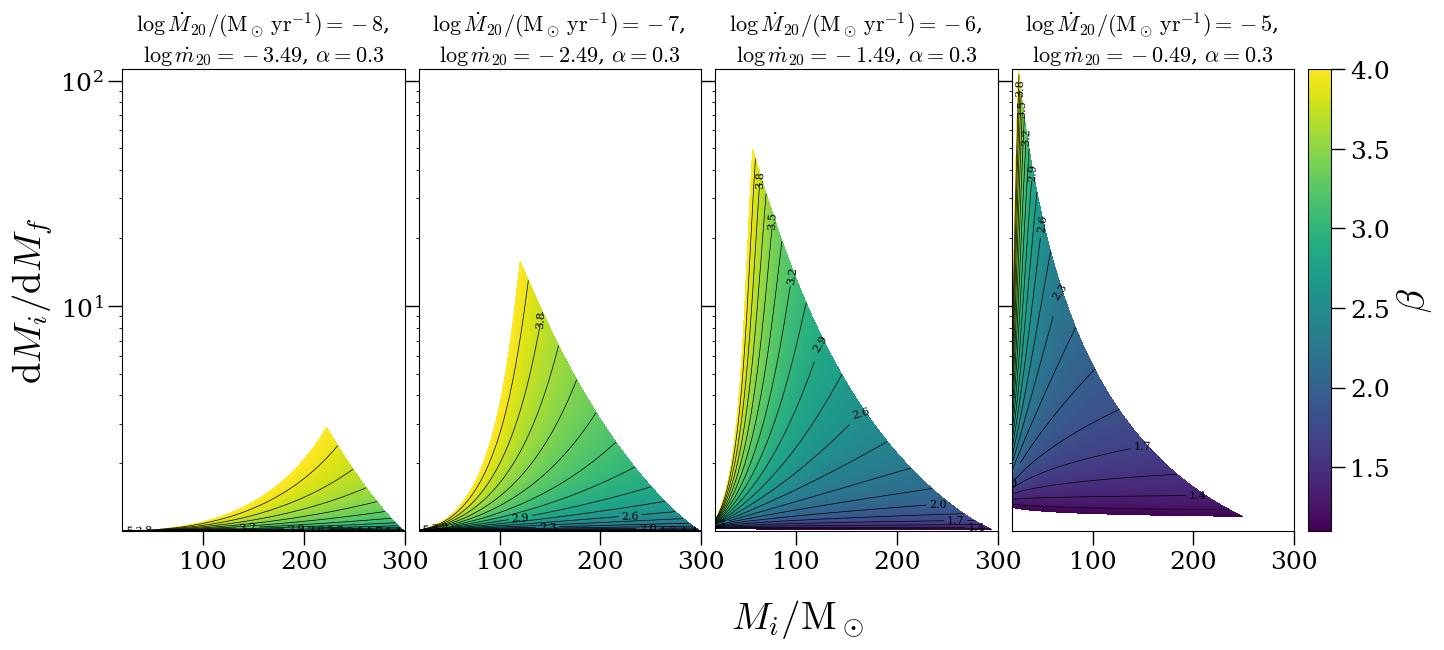

In [15]:
nu = 0.3
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4

a_list = 10.**np.arange(-8, -4, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\beta$')

axes[0].set_ylabel('$\\mathrm{d} M_i/\\mathrm{d} M_f$')
fig.text(0.5, 0, '$M_i/\\mathrm{M}_\\odot$', ha='center', va='top', transform=fig.transFigure)
ax.set_xlim(20, 300)
#ax.set_ylim(0,1)

ax.set_yscale('log')

In [8]:
@np.vectorize
def dn_dm(m, alpha=2.35, mmin=1, mmax=300):
    if m < mmin:
        return 0.
    elif m <= mmax:
        return m**-alpha
    else:
        return 0.

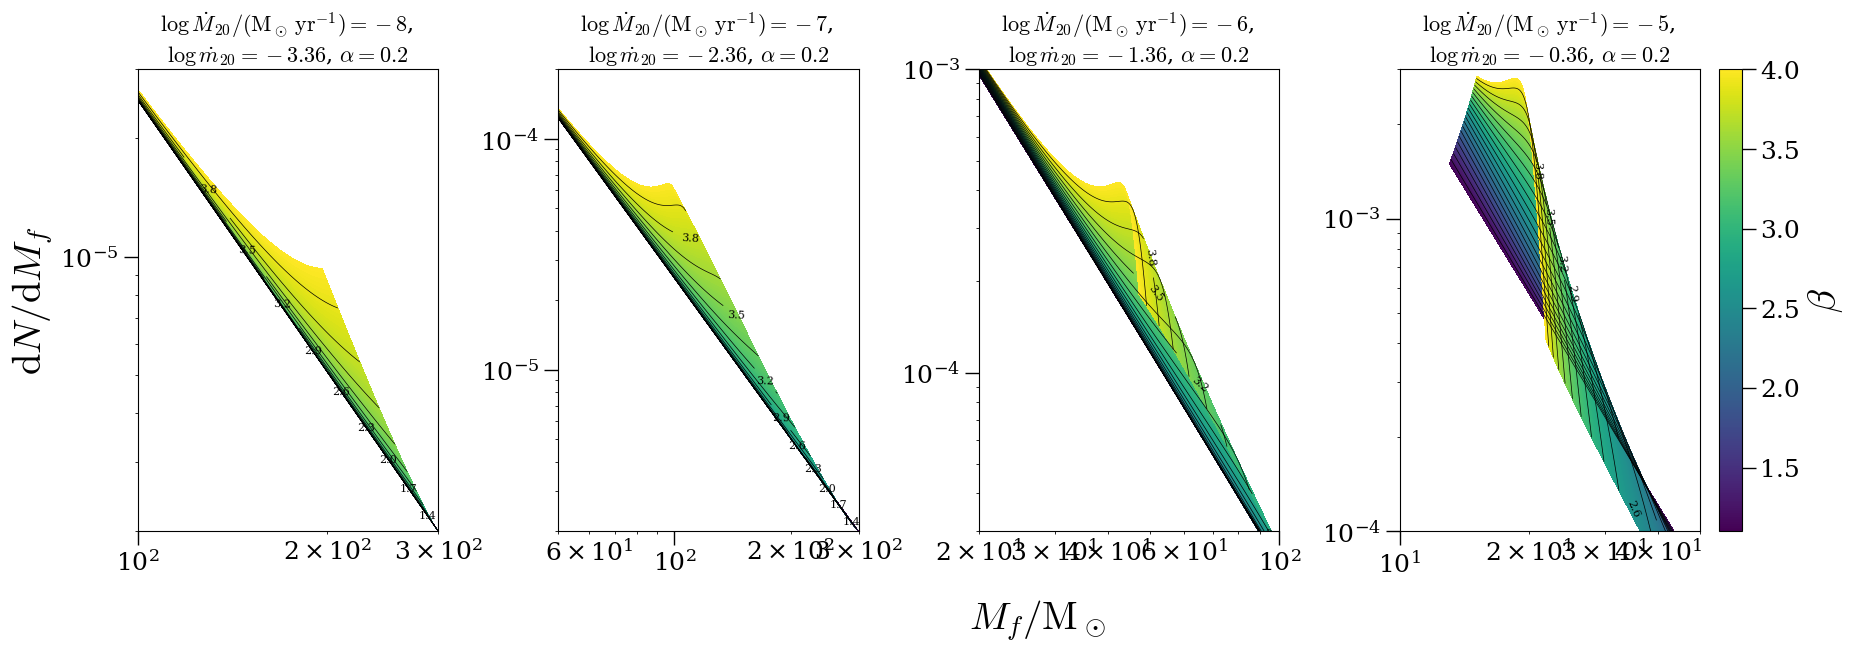

In [17]:
nu = 0.2
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4

a_list = 10.**np.arange(-8, -4, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=False, sharey=False)
fig.subplots_adjust(wspace=0.4)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3, mmin=1, mmax=300)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\beta$')

axes[0].set_ylabel('$\\mathrm{d} N/\\mathrm{d} M_f$')
fig.text(0.5, 0, '$M_f/\\mathrm{M}_\\odot$', ha='center', va='top', transform=fig.transFigure)
axes[0].set_xlim(100, 300)
axes[0].set_ylim(2e-6, 3e-5)
axes[1].set_xlim(50, 300)
axes[1].set_ylim(2e-6, 2e-4)
axes[2].set_xlim(20, 100)
axes[2].set_ylim(3e-5, 1e-3)
axes[3].set_xlim(10, 50)
axes[3].set_ylim(1e-4, 3e-3)
#ax.set_ylim(0,1)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

In [9]:
@np.vectorize
def dnche_dn(m):
    l2of = 0.7 + (1.2 - 0.7)/(300 - 20) * (m - 20)
    
    
    nche = 0.7 + (4.0 - 0.7)/(300 - 20) * (m - 20)
    
    dnche = np.log(nche/l2of) / np.log(1e4/0.4)
    dnche = np.max(dnche, 0)
        
    return dnche

/tmp/ipykernel_168809/1402266829.py:5: RuntimeWarning: invalid value encountered in power
  a = a_power**(1/(1-mu)) * xscale


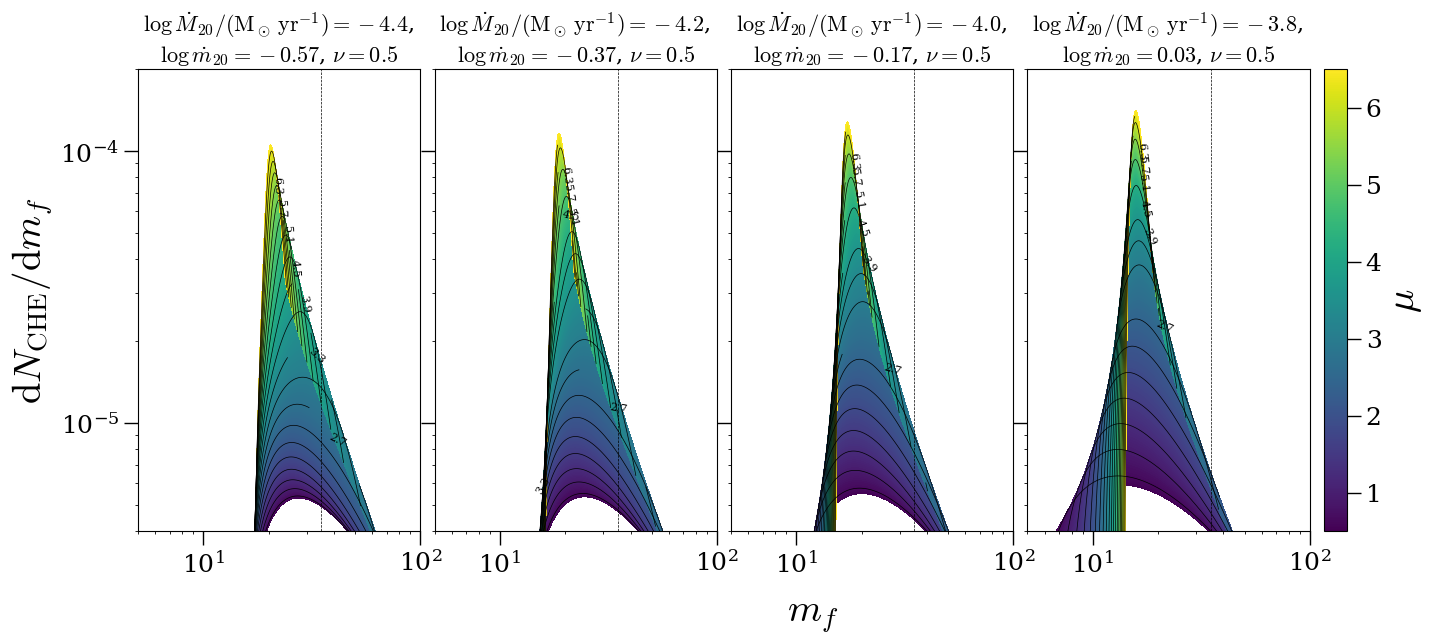

In [19]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1.5e-4

# a is the mass loss rate for m = xscale
min_mu = 0.5
max_mu = 6.5

a_list = 10.**np.array([-4.4, -4.2, -4.0, -3.8])
x = np.linspace(10, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3) * dnche_dn(X)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)


sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} m_f$')
fig.text(0.5, 0, '$m_f$', ha='center', va='top', transform=fig.transFigure)



ax.set_xlim(5, 100)
ax.set_ylim(4e-6, 2e-4)

ax.set_xscale('log')
ax.set_yscale('log')

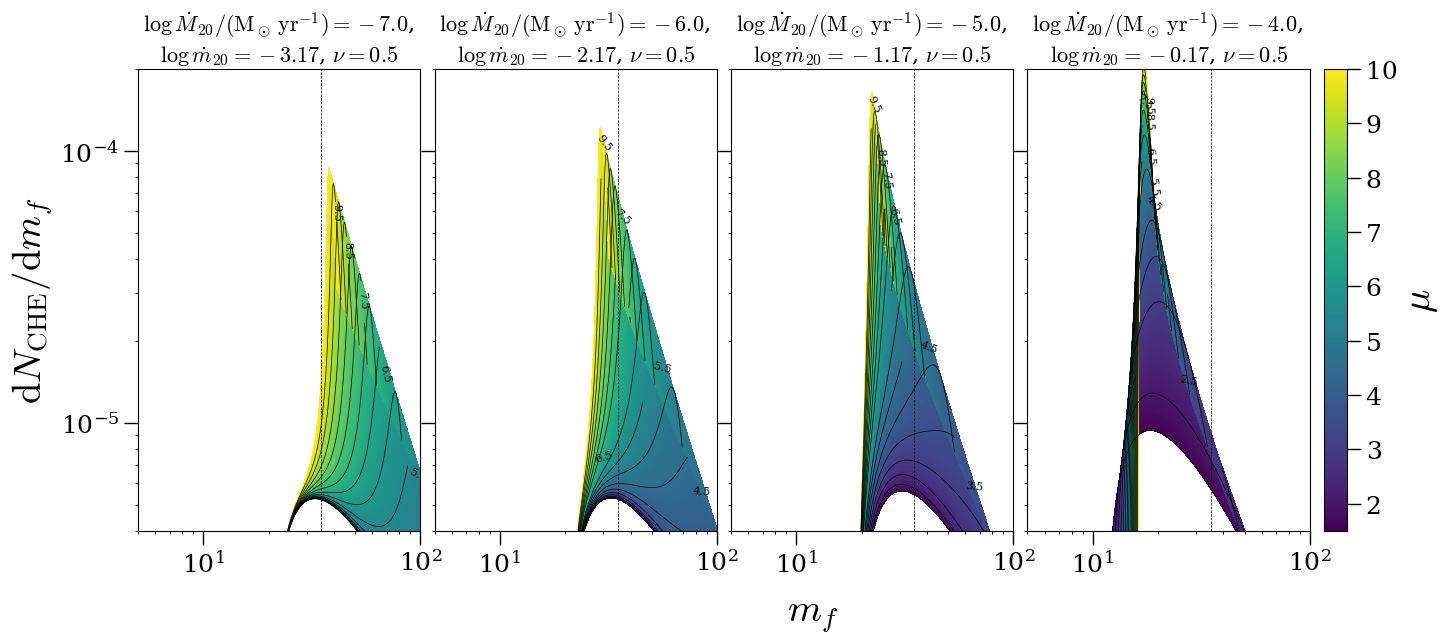

In [20]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1.5e-4

# a is the mass loss rate for m = xscale
min_mu = 1.5
max_mu = 10.

a_list = 10.**np.array([-7, -6, -5, -4])
x = np.linspace(10, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3) * dnche_dn(X)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)


sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} m_f$')
fig.text(0.5, 0, '$m_f$', ha='center', va='top', transform=fig.transFigure)



ax.set_xlim(5, 100)
ax.set_ylim(4e-6, 2e-4)

ax.set_xscale('log')
ax.set_yscale('log')

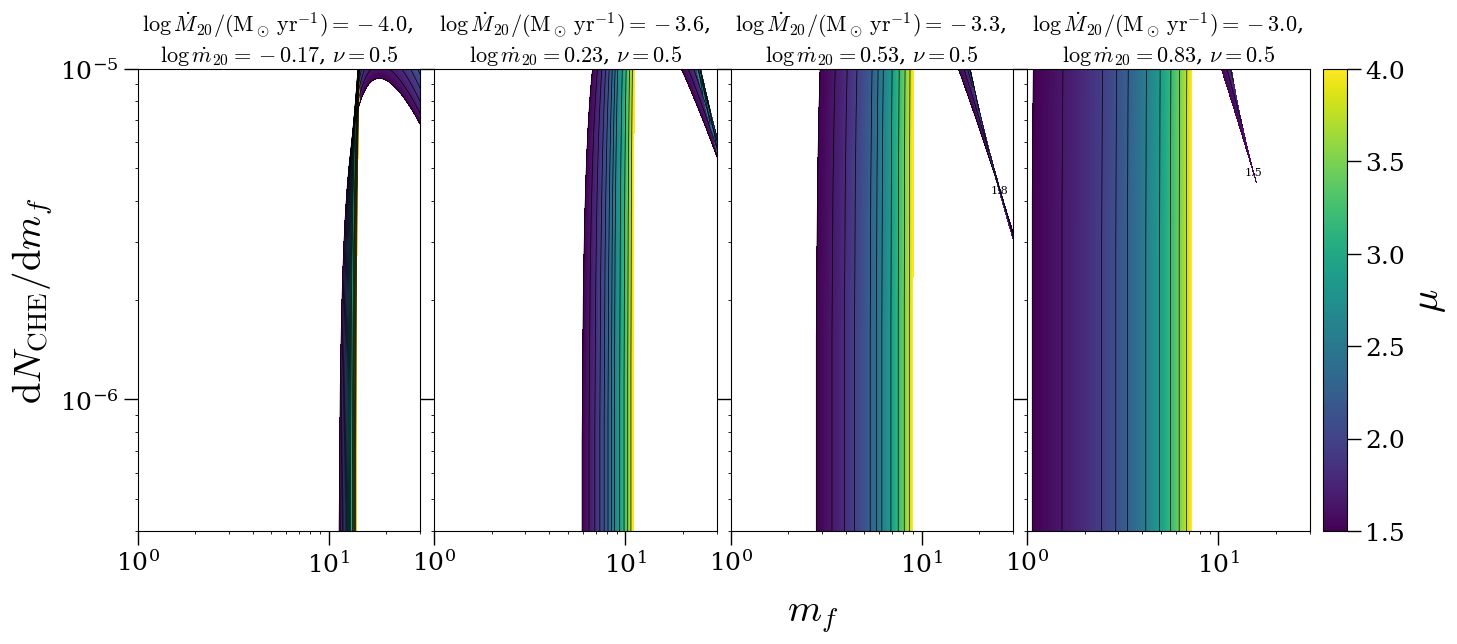

In [21]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1e-5

# a is the mass loss rate for m = xscale
min_mu = 1.5
max_mu = 4.

a_list = 10.**np.array([-4, -3.6, -3.3, -3])
x = np.linspace(1, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3) * dnche_dn(X)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)


sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} m_f$')
fig.text(0.5, 0, '$m_f$', ha='center', va='top', transform=fig.transFigure)



ax.set_xlim(1, 30)
ax.set_ylim(y0_, y1_)

ax.set_xscale('log')
ax.set_yscale('log')

In [10]:
def dmzams_dmwr(mwr, norm=10.**-0.3, alpha=0.95):
    #mwr = (mzams/norm)**-alpha
    return norm*alpha*mwr**(alpha-1)

@np.vectorize
def mpeak2(a, nu, beta, xscale=1., tscale=1.e10, res=1000, imf_slope=2.3, mmin=1, mmax=300, wr=False, wr_norm=10.**-0.3, wr_alpha=0.95):
    x = np.linspace(10, 300, res)
    test_Y1 = 1/mider_mf(x, a, nu, beta, xscale=xscale, tscale=tscale) * dn_dm(x, alpha=imf_slope, mmin=mmin, mmax=mmax) * dnche_dn(x)
    if wr:
        test_Y1 *= dmzams_dmwr(x, norm=wr_norm, alpha=wr_alpha)
    peak_i = np.argmax(test_Y1)
    mpeak = mf(x[peak_i], a, nu, beta, xscale=xscale, tscale=tscale)
    return mpeak

In [11]:
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

mpeak_norm = TwoSlopeNorm(vmin=1, vmax=100, vcenter=35.)
cmap = cm.seismic
mpeak_cmap = LinearSegmentedColormap.from_list('mpeak', cmap(mpeak_norm(np.linspace(1, 100, 10000))), N=10000)

logmpeak_norm = TwoSlopeNorm(vmin=1, vmax=2.5, vcenter=1.54)
logmpeak_cmap = LinearSegmentedColormap.from_list('mpeak', cmap(logmpeak_norm(np.linspace(1, 2.5, 10000))), N=10000)

CPU times: user 4min 54s, sys: 35.6 ms, total: 4min 54s
Wall time: 4min 54s


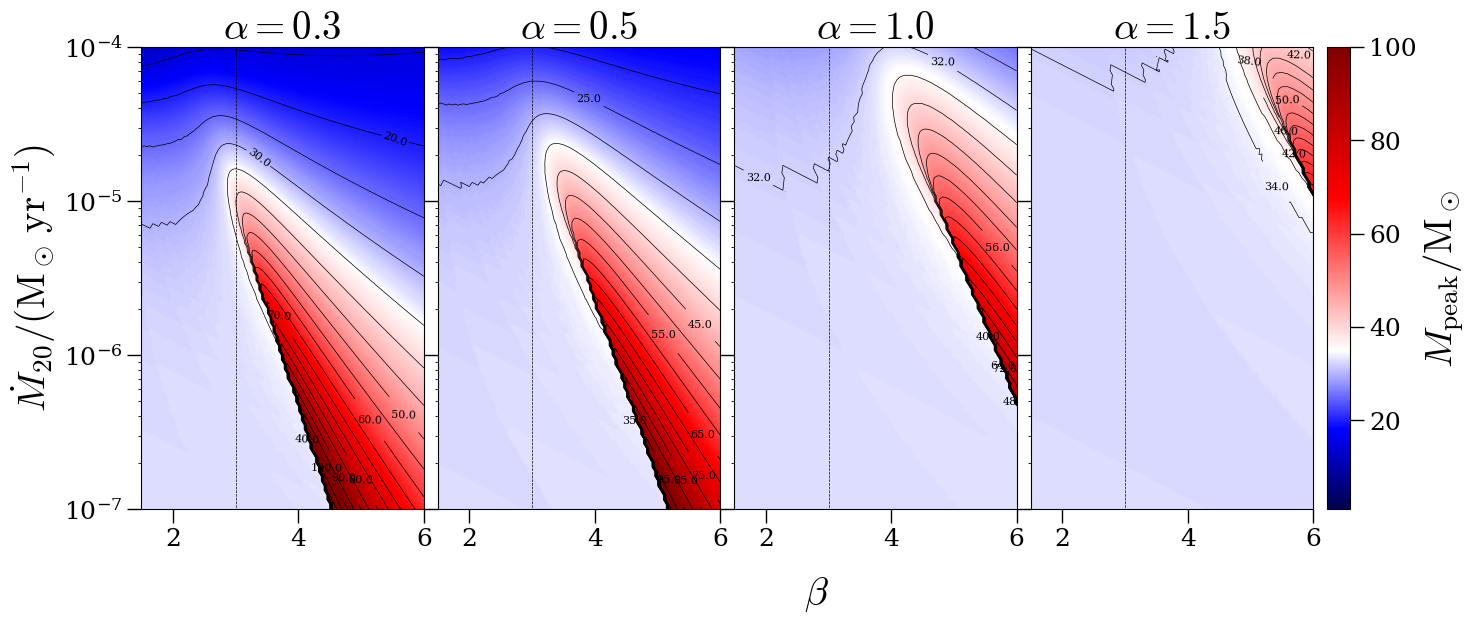

In [25]:
%%time
alphas = [0.3, 0.5, 1., 1.5]
beta = np.linspace(1.5, 6, 100)
mrs = np.logspace(-7, -4, 100)
xscale = 20
tscale = 6.e5
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.5, 6)
axes[0].set_ylim(1e-7, 1e-4)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



CPU times: user 4min 55s, sys: 83.9 ms, total: 4min 55s
Wall time: 4min 55s


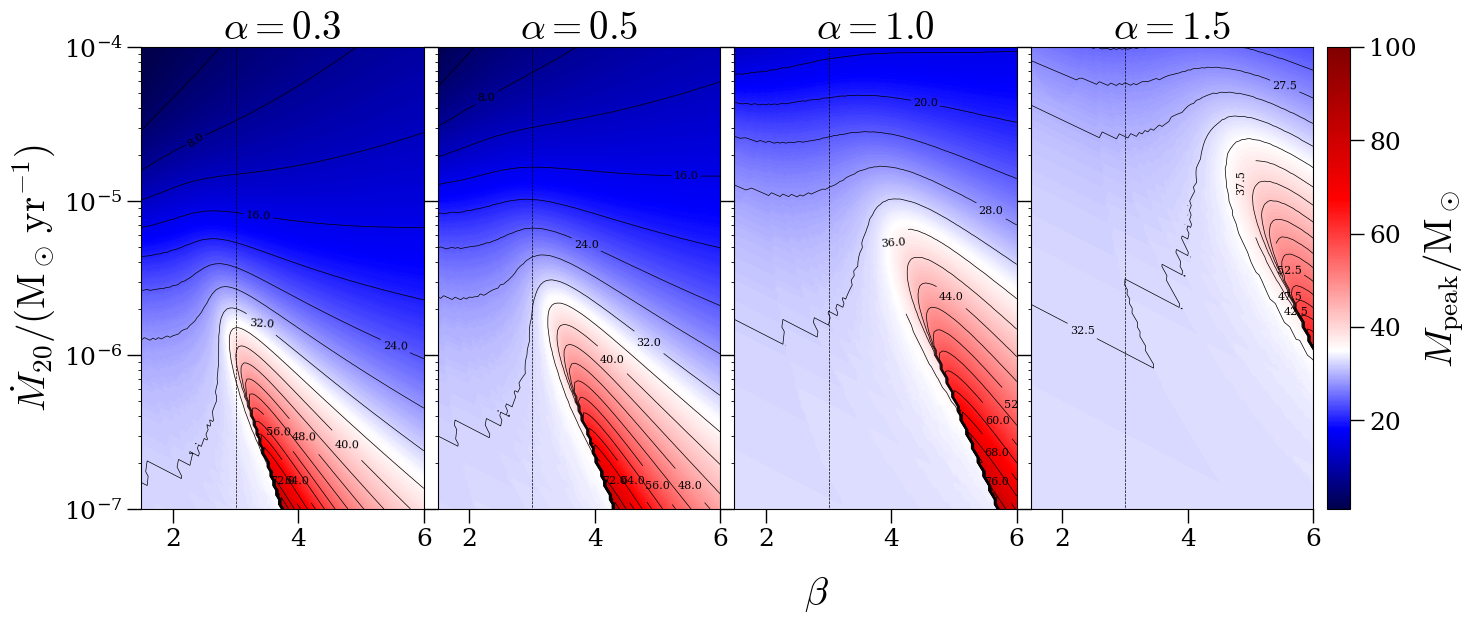

In [26]:
%%time
alphas = [0.3, 0.5, 1., 1.5]
beta = np.linspace(1.5, 6, 100)
mrs = np.logspace(-7, -4, 100)
xscale = 20
tscale = 6.e6
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.5, 6)
axes[0].set_ylim(1e-7, 1e-4)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



CPU times: user 12 s, sys: 0 ns, total: 12 s
Wall time: 12 s


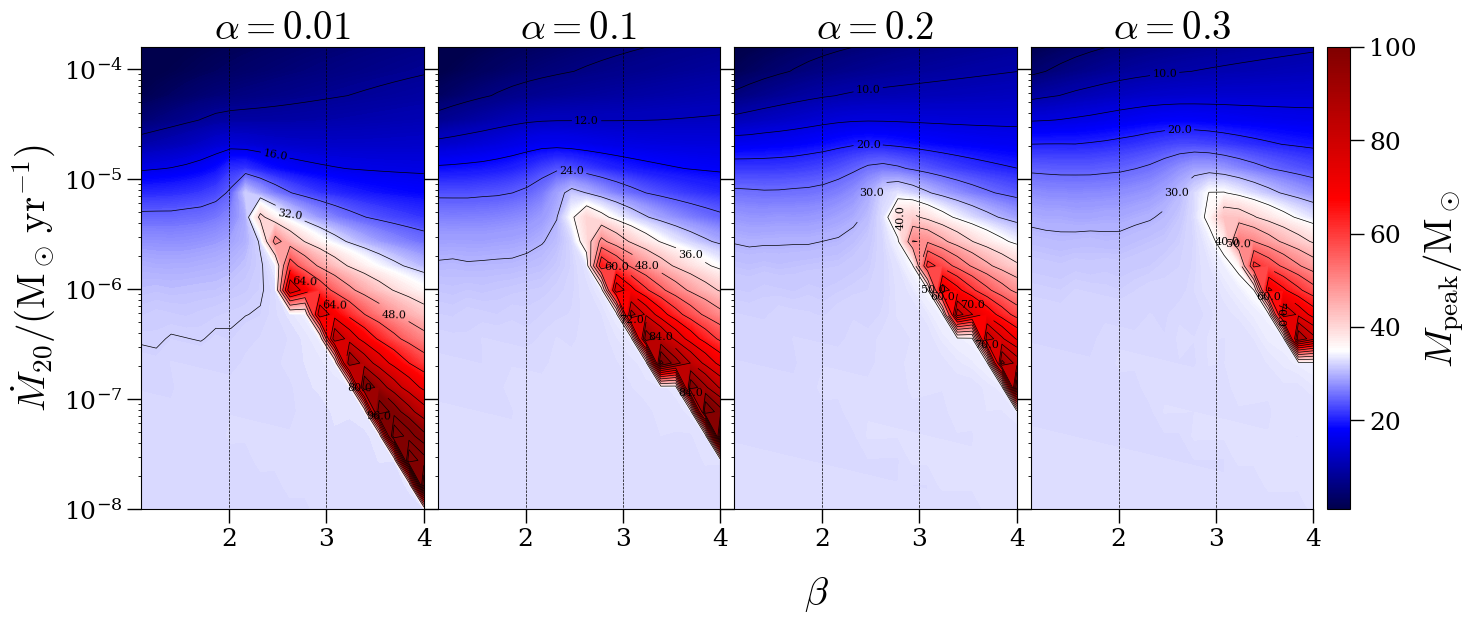

In [27]:
%%time
alphas = [0.01, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 20)
mrs = np.logspace(-8, -3.8, 20)
xscale = 20
tscale = 10.**6.1
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=2.3, mmin=20)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.vlines(2, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.1, 4)
axes[0].set_ylim(1e-8, 10.**-3.8)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



In [12]:
def s20_logmdot_to_logz(logmdot):
    return 1.38*logmdot + 6.99

def s20_logz_to_logmdot(logz):
    return 0.72*logz - 5.07

CPU times: user 12.1 s, sys: 0 ns, total: 12.1 s
Wall time: 12.1 s


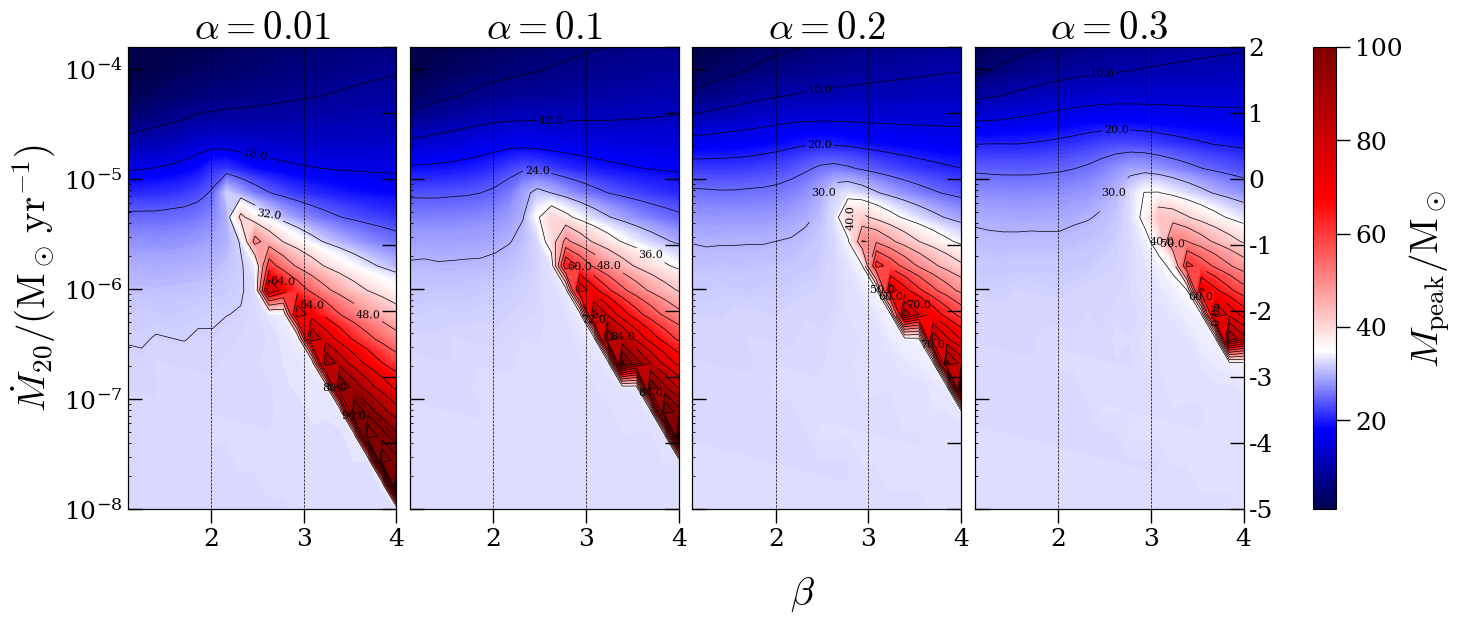

In [29]:
%%time
alphas = [0.01, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 20)
mrs = np.logspace(-8, -3.8, 20)
xscale = 20
tscale = 10.**6.1
cmap = mpeak_cmap
vmin = 1
vmax = 100
ylim0 = 1e-8
ylim1 = 10.**-3.8
ylim0_logz = s20_logmdot_to_logz(np.log10(ylim0))
ylim1_logz = s20_logmdot_to_logz(np.log10(ylim1))

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=2.3, mmin=20, mmax=300)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.vlines(2, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.tick_params(axis='y', which='both', direction='in')
    
    ax2 = ax.twinx()
    ax2.set_ylim(ylim0_logz, ylim1_logz)
    yticks = np.arange(np.floor(ylim0_logz), np.ceil(ylim1_logz)+1, 1)
    ax2.set_yticks(yticks)
    if i == len(alphas)-1:
        ax2.set_yticklabels([f'{int(t)}' for t in yticks])  
    else:
        ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', direction='in')
    
axes[0].set_xlim(1.1, 4)
axes[0].set_ylim(ylim0, ylim1)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.05)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



CPU times: user 4min 54s, sys: 11.9 ms, total: 4min 54s
Wall time: 4min 54s


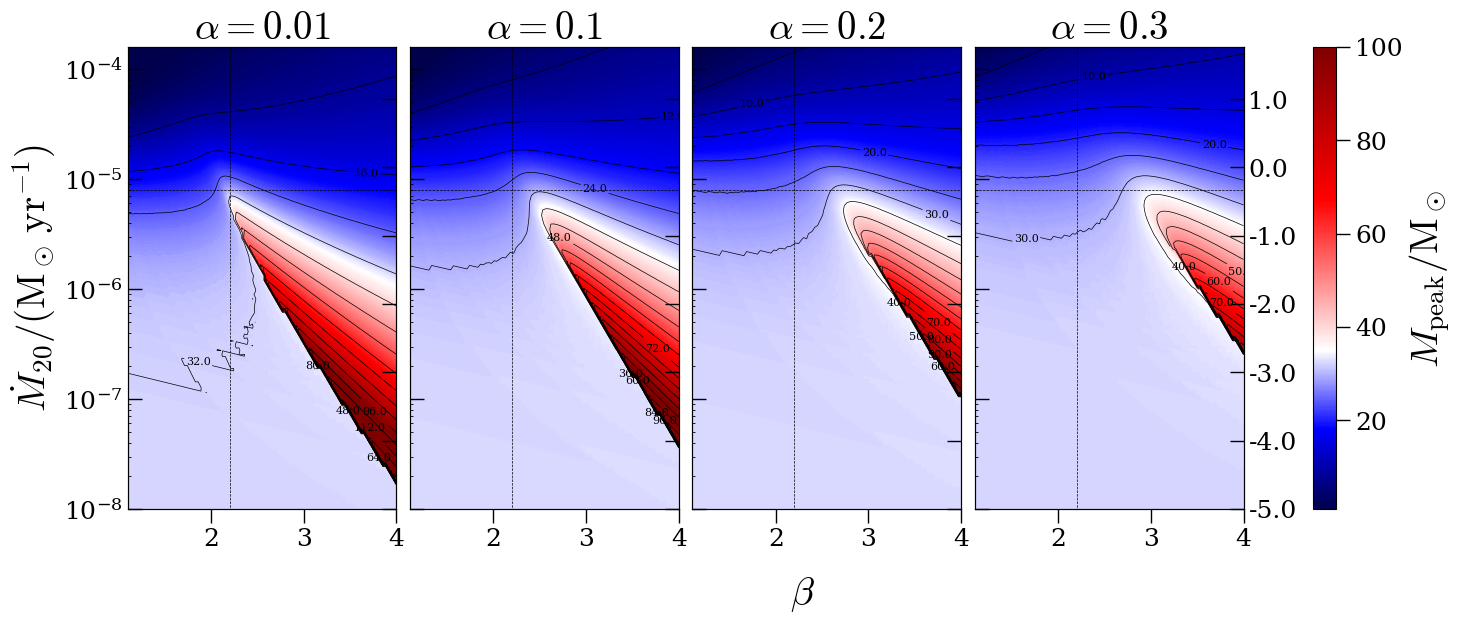

In [ ]:
%%time
alphas = [0.01, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 100)
mrs = np.logspace(-8, -3.8, 100)
xscale = 20
tscale = 10.**6.1
cmap = mpeak_cmap
vmin = 1
vmax = 100
ylim0 = 1e-8
ylim1 = 10.**-3.8
ylim0_logz = s20_logmdot_to_logz(np.log10(ylim0))
ylim1_logz = s20_logmdot_to_logz(np.log10(ylim1))
xlim0 = 1.1
xlim1 = 4

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=2.3, mmin=20, mmax=300, wr=True)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(2.2, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.hlines(8e-6, xlim0, xlim1, color='k', linestyle='--', lw=0.5)
    ax.tick_params(axis='y', which='both', direction='in')
    
    
    ax2 = ax.twinx()
    ax2.set_ylim(np.log10(ylim0), np.log10(ylim1))
    yticklabels = np.arange(np.floor(ylim0_logz), np.ceil(ylim1_logz), 1)
    yticks = s20_logz_to_logmdot(yticklabels)
    ax2.set_yticks(yticks)
    if i == len(alphas)-1:
        ax2.set_yticklabels(yticklabels)  
    else:
        ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', direction='in')
    
axes[0].set_xlim(xlim0, xlim1)
axes[0].set_ylim(ylim0, ylim1)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.05)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')


CPU times: user 12 s, sys: 7.98 ms, total: 12 s
Wall time: 12 s


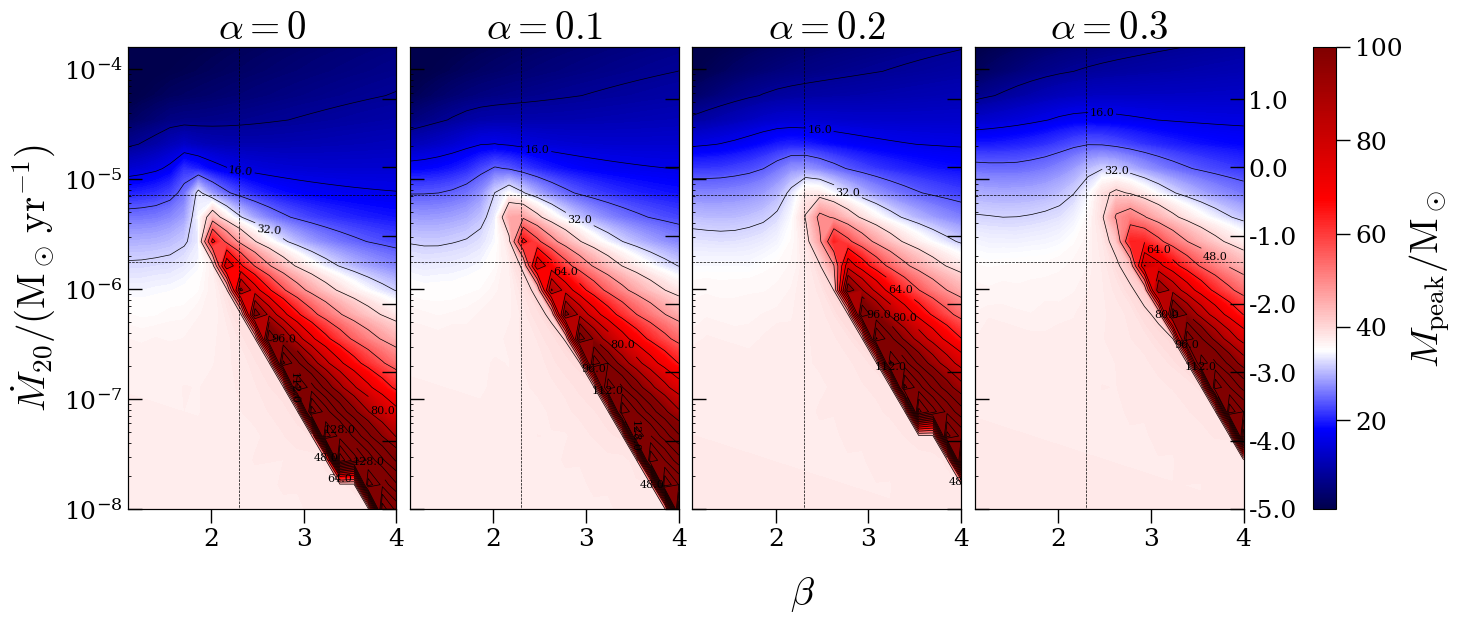

In [ ]:
%%time
alphas = [0, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 20)
mrs = np.logspace(-8, -3.8, 20)
xscale = 20
tscale = 10.**6.23
cmap = mpeak_cmap
vmin = 1
vmax = 100
ylim0 = 1e-8
ylim1 = 10.**-3.8
ylim0_logz = s20_logmdot_to_logz(np.log10(ylim0))
ylim1_logz = s20_logmdot_to_logz(np.log10(ylim1))
xlim0 = 1.1
xlim1 = 4

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=2.3, mmin=20, mmax=300, wr=True, wr_norm=10.**-0.66, wr_alpha=1.45)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(2.3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.hlines(10.**-5.75, xlim0, xlim1, color='k', linestyle='--', lw=0.5)
    ax.hlines(4*10.**-5.75, xlim0, xlim1, color='k', linestyle='--', lw=0.5)
    ax.tick_params(axis='y', which='both', direction='in')
    
    
    ax2 = ax.twinx()
    ax2.set_ylim(np.log10(ylim0), np.log10(ylim1))
    yticklabels = np.arange(np.floor(ylim0_logz), np.ceil(ylim1_logz), 1)
    yticks = s20_logz_to_logmdot(yticklabels)
    ax2.set_yticks(yticks)
    if i == len(alphas)-1:
        ax2.set_yticklabels(yticklabels)  
    else:
        ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', direction='in')
    
axes[0].set_xlim(xlim0, xlim1)
axes[0].set_ylim(ylim0, ylim1)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.05)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')


CPU times: user 12.1 s, sys: 4 ms, total: 12.1 s
Wall time: 12.1 s


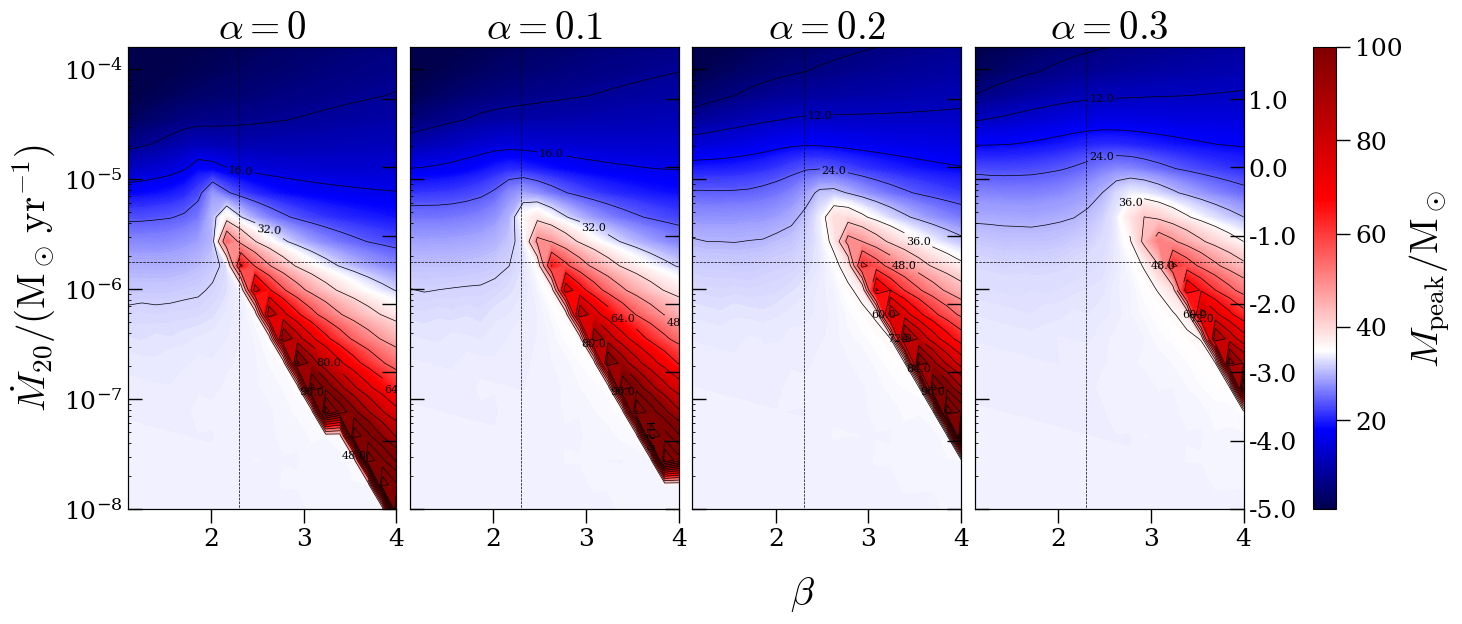

In [ ]:
%%time
alphas = [0, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 20)
mrs = np.logspace(-8, -3.8, 20)
xscale = 20
tscale = 10.**6.23
cmap = mpeak_cmap
vmin = 1
vmax = 100
ylim0 = 1e-8
ylim1 = 10.**-3.8
ylim0_logz = s20_logmdot_to_logz(np.log10(ylim0))
ylim1_logz = s20_logmdot_to_logz(np.log10(ylim1))
xlim0 = 1.1
xlim1 = 4

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=2.3, mmin=30, mmax=300, wr=True, wr_norm=10.**-0.25, wr_alpha=1.16)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(2.3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.hlines(10.**-5.75, xlim0, xlim1, color='k', linestyle='--', lw=0.5)
    ax.tick_params(axis='y', which='both', direction='in')
    
    
    ax2 = ax.twinx()
    ax2.set_ylim(np.log10(ylim0), np.log10(ylim1))
    yticklabels = np.arange(np.floor(ylim0_logz), np.ceil(ylim1_logz), 1)
    yticks = s20_logz_to_logmdot(yticklabels)
    ax2.set_yticks(yticks)
    if i == len(alphas)-1:
        ax2.set_yticklabels(yticklabels)  
    else:
        ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', direction='in')
    
axes[0].set_xlim(xlim0, xlim1)
axes[0].set_ylim(ylim0, ylim1)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.05)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')


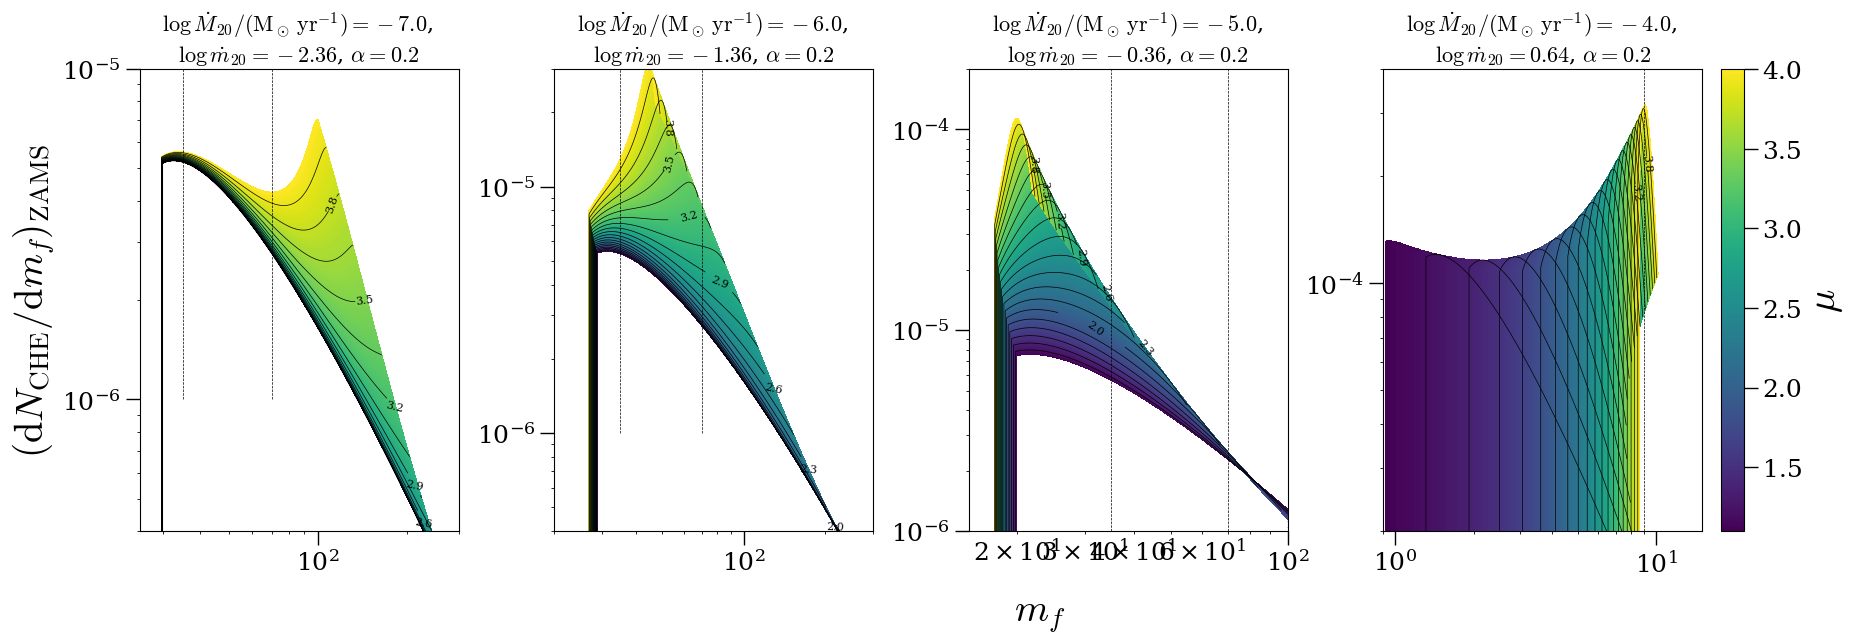

In [ ]:
nu = 0.2
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1.5e-4

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4.

a_list = 10.**np.array([-7, -6, -5, -4])
x = np.linspace(10, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=False, sharey=False)
fig.subplots_adjust(wspace=0.3)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3, mmin=30, mmax=300) * dnche_dn(X) 
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(9, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(70, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.plot(np.logspace(0, 2.5, 10), np.logspace(0, 2.5, 10)**-1.3 / newX[500, 0]**-1.3 * Y1[500, 0], 'k--', lw=0.5)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$(\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} m_f)_\\mathrm{ZAMS}$')
fig.text(0.5, 0, '$m_f$', ha='center', va='top', transform=fig.transFigure)

axes[0].set_xlim(25, 300)
axes[0].set_ylim(4e-7, 1e-5)
axes[1].set_xlim(20, 300)
axes[1].set_ylim(4e-7, 3e-5)
axes[2].set_xlim(15, 100)
axes[2].set_ylim(1e-6, 2e-4)
axes[3].set_xlim(0.9, 15)
axes[3].set_ylim(2e-5, 4e-4)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


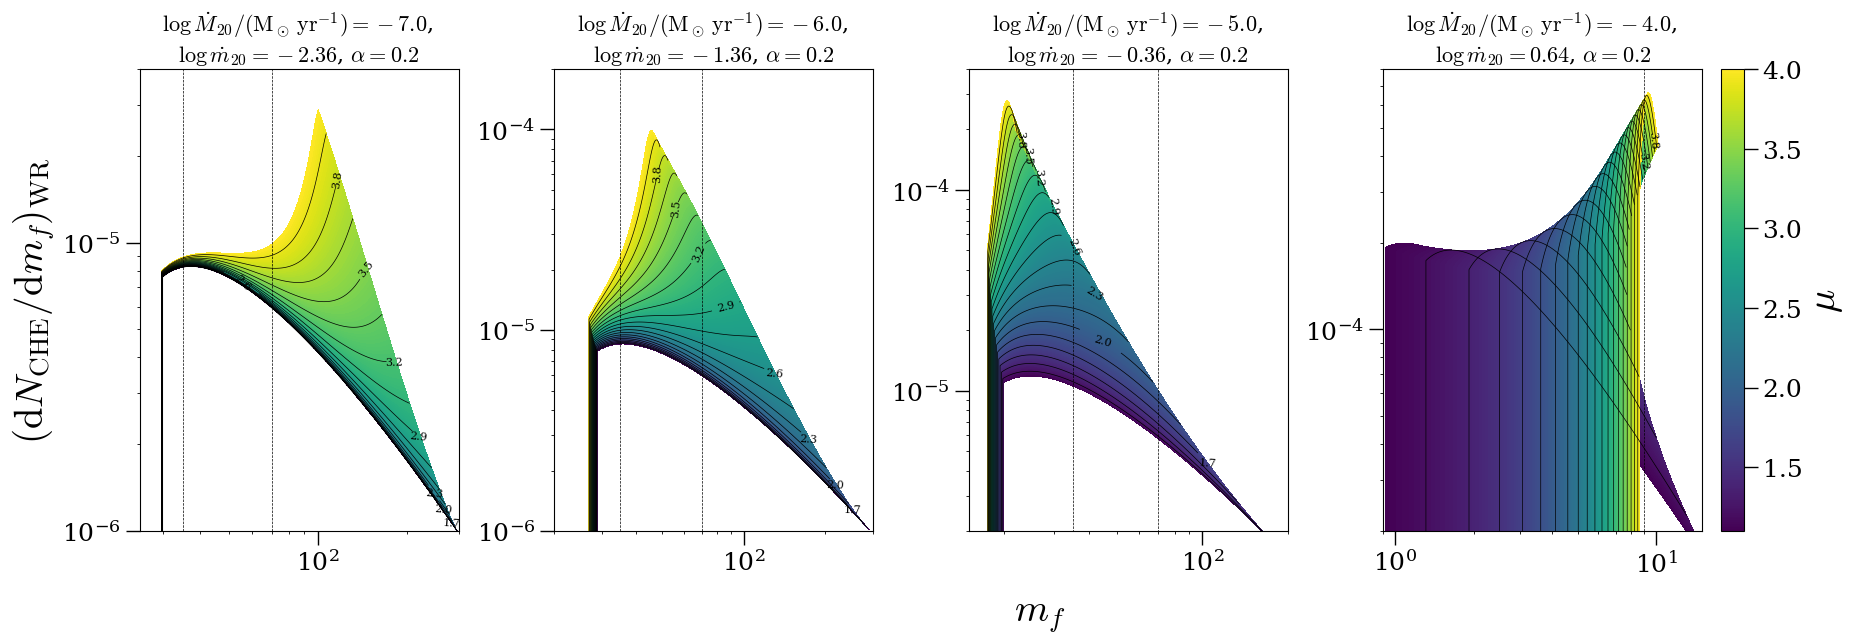

In [13]:
nu = 0.2
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1.5e-4

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4.

a_list = 10.**np.array([-7, -6, -5, -4])
x = np.linspace(10, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=False, sharey=False)
fig.subplots_adjust(wspace=0.3)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3, mmin=30, mmax=300) * dnche_dn(X) * dmzams_dmwr(X, norm=10.**-0.66, alpha=1.45)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(9, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(70, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.plot(np.logspace(0, 2.5, 10), np.logspace(0, 2.5, 10)**-1.3 / newX[500, 0]**-1.3 * Y1[500, 0], 'k--', lw=0.5)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$(\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} m_f)_\\mathrm{WR}$')
fig.text(0.5, 0, '$m_f$', ha='center', va='top', transform=fig.transFigure)

axes[0].set_xlim(25, 300)
axes[0].set_ylim(1e-6, 4e-5)
axes[1].set_xlim(20, 300)
axes[1].set_ylim(1e-6, 2e-4)
axes[2].set_xlim(15, 200)
axes[2].set_ylim(2e-6, 4e-4)
axes[3].set_xlim(0.9, 15)
axes[3].set_ylim(2e-5, 8e-4)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

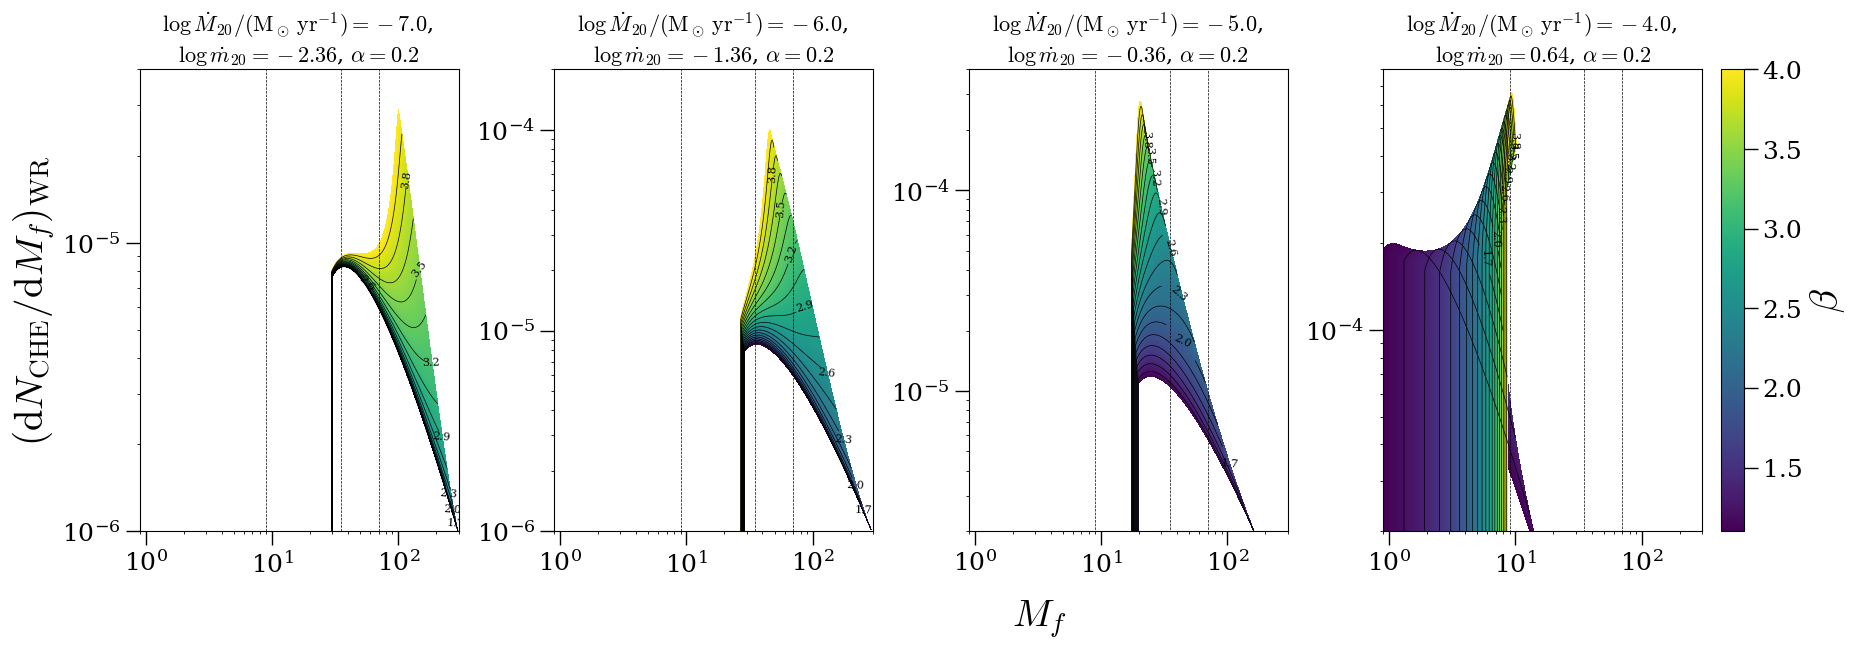

In [17]:
nu = 0.2
xscale = 20
tscale = 10.**6.2
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1
y0_ = 4e-7
y1_ = 1.5e-4

# a is the mass loss rate for m = xscale
min_mu = 1.1
max_mu = 4.

a_list = 10.**np.array([-7, -6, -5, -4])
x = np.linspace(10, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=False)
fig.subplots_adjust(wspace=0.3)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = 1/mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale) * dn_dm(X, alpha=2.3, mmin=30, mmax=300) * dnche_dn(X) * dmzams_dmwr(X, norm=10.**-0.66, alpha=1.45)
    newX = mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(newX, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(newX, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.1f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\alpha={nu}$', fontsize=16)
    ax.vlines(35, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(9, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.vlines(70, 1e-6, 1e-3, color='k', linestyle='--', lw=0.5)
    ax.plot(np.logspace(0, 2.5, 10), np.logspace(0, 2.5, 10)**-1.3 / newX[500, 0]**-1.3 * Y1[500, 0], 'k--', lw=0.5)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\beta$')

axes[0].set_ylabel('$(\\mathrm{d} N_\\mathrm{CHE}/\\mathrm{d} M_f)_\\mathrm{WR}$')
fig.text(0.5, 0, '$M_f$', ha='center', va='top', transform=fig.transFigure)

axes[0].set_xlim(0.9, 300)
axes[0].set_ylim(1e-6, 4e-5)
#axes[1].set_xlim(20, 300)
axes[1].set_ylim(1e-6, 2e-4)
#axes[2].set_xlim(15, 200)
axes[2].set_ylim(2e-6, 4e-4)
#axes[3].set_xlim(0.9, 15)
axes[3].set_ylim(2e-5, 8e-4)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

$$
\begin{align*}
\tau &= \tau_{20} \left(\frac{M}{20\,\mathrm{M}_\odot}\right)^{-\alpha}, \alpha>0,  \\
\dot{M} &= \dot{M}_{20} \left(\frac{M}{20\,\mathrm{M}_\odot}\right)^\beta, \beta>0, \\
\dot{m}_{20} &= \frac{\dot{M}_{20}}{20\,\mathrm{M}_\odot/\tau_{20}}, \\
\left(\frac{\mathrm{d}N_\mathrm{CHE}}{\mathrm{d}M_f}\right)_\mathrm{WR} &= \underbrace{\frac{\mathrm{d}N_\mathrm{CHE}}{\mathrm{d}N_\ast}}_{\int_{\mathrm{CHE}(M_\mathrm{ZAMS})}\frac{\mathrm{d}P}{P}}\underbrace{\frac{\mathrm{d}N_\ast}{\mathrm{d}M_\mathrm{ZAMS}}}_\mathrm{IMF}\underbrace{\frac{\mathrm{d}M_\mathrm{ZAMS}}{\mathrm{d}M_\mathrm{WR}}}_\mathrm{MESA}\underbrace{\frac{\mathrm{d}M_\mathrm{WR}}{\mathrm{d}M_f}}_\mathrm{analytical}.
\end{align*}
$$

CPU times: user 11.8 s, sys: 3 µs, total: 11.8 s
Wall time: 11.8 s


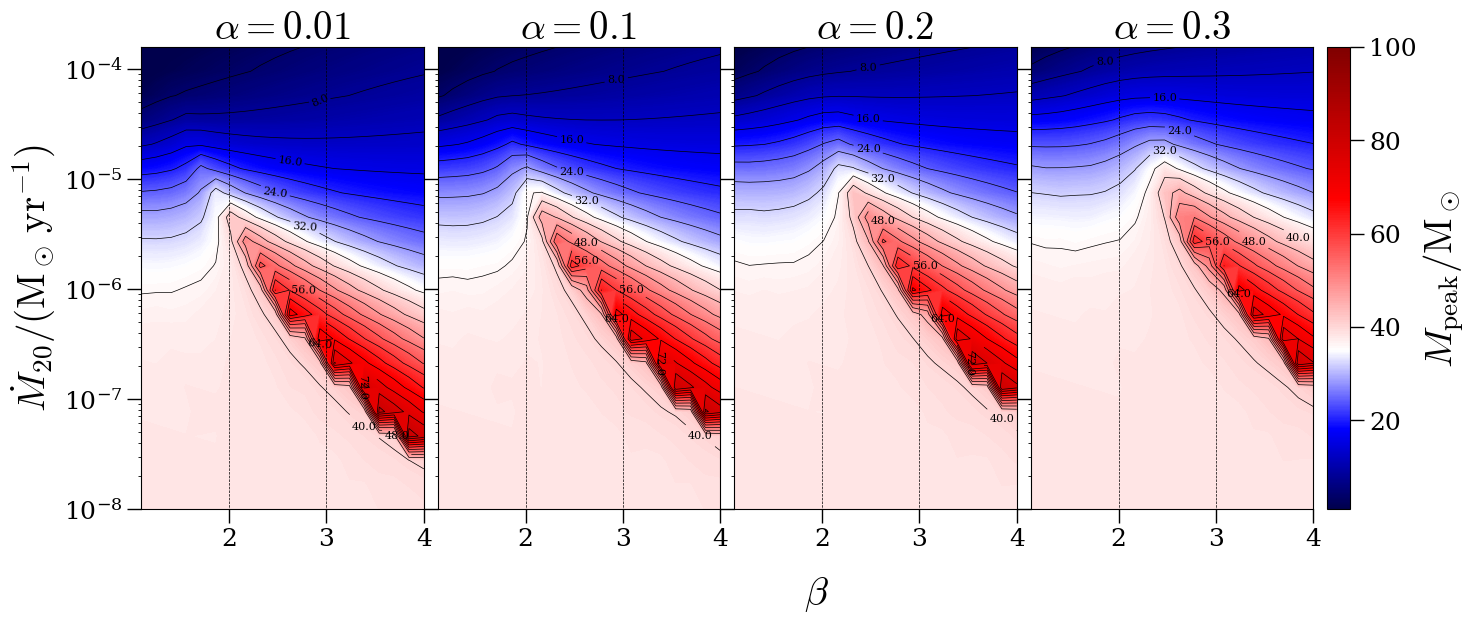

In [ ]:
%%time
alphas = [0.01, 0.1, 0.2, 0.3]
beta = np.linspace(1.1, 4, 20)
mrs = np.logspace(-8, -3.8, 20)
xscale = 20
tscale = 10.**6.1
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000, imf_slope=1.8, mmax=100)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    ax.vlines(2, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.1, 4)
axes[0].set_ylim(1e-8, 10.**-3.8)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



CPU times: user 4min 53s, sys: 7.93 ms, total: 4min 53s
Wall time: 4min 53s


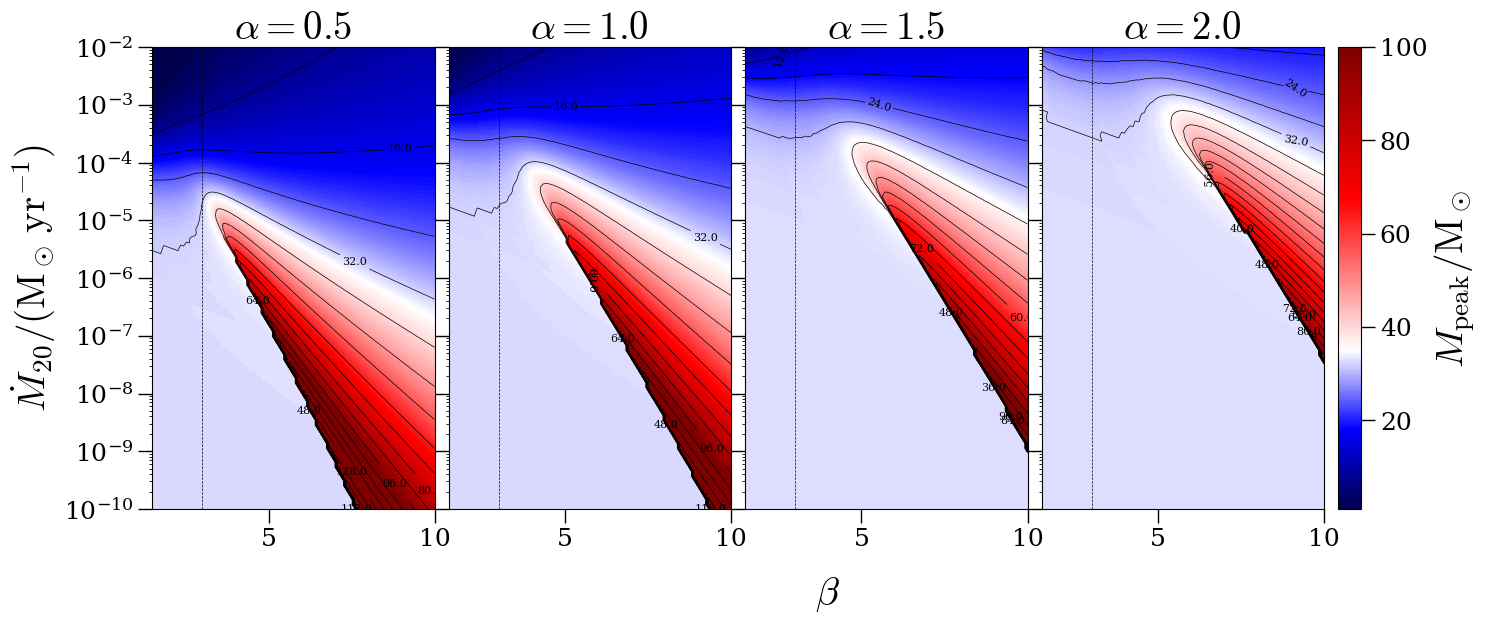

In [ ]:
%%time
alphas = [0.5, 1., 1.5, 2.]
beta = np.linspace(1.5, 10, 100)
mrs = np.logspace(-10, -2, 100)
xscale = 20
tscale = 6.e5
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.5, 10)
axes[0].set_ylim(1e-10, 1e-2)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



CPU times: user 4min 52s, sys: 23.9 ms, total: 4min 52s
Wall time: 4min 52s


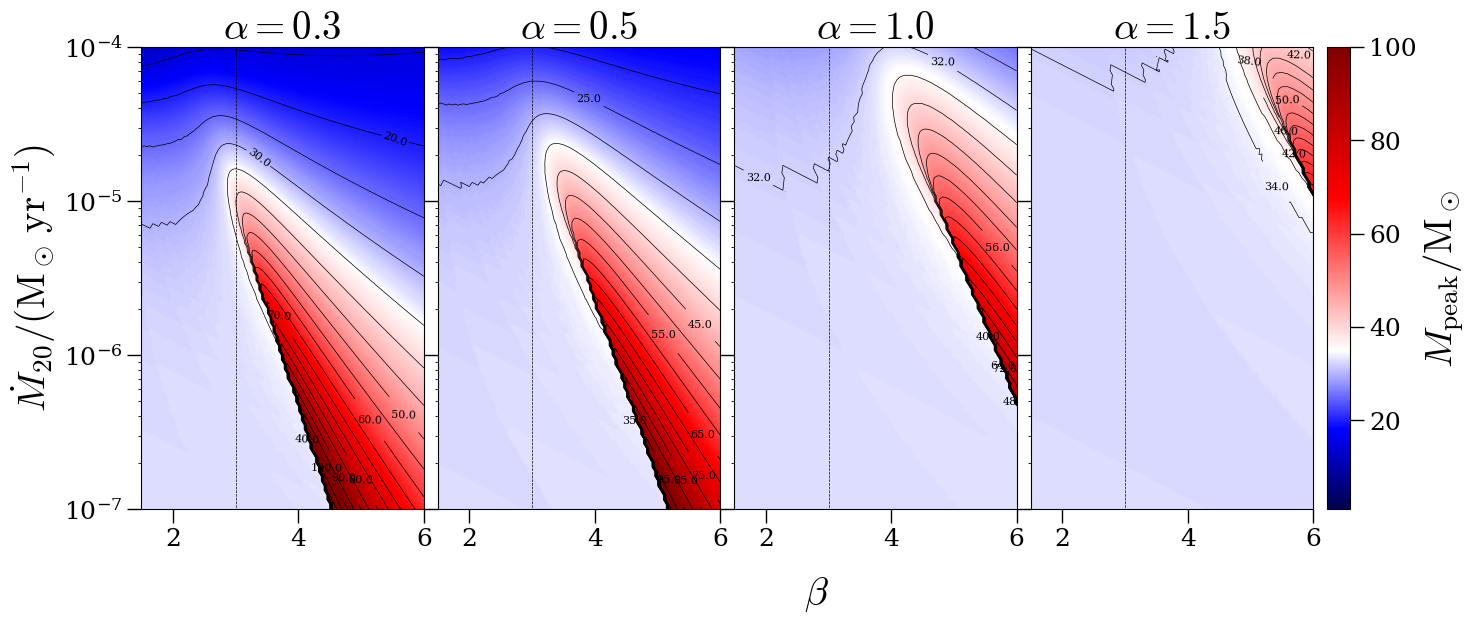

In [ ]:
%%time
alphas = [0.3, 0.5, 1., 1.5]
beta = np.linspace(1.5, 6, 100)
mrs = np.logspace(-7, -4, 100)
xscale = 20
tscale = 6.e5
cmap = mpeak_cmap
vmin = 1
vmax = 100

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, res=1000)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    ax.vlines(3, 1e-10, 1e-2, color='k', linestyle='--', lw=0.5)
    
axes[0].set_xlim(1.5, 6)
axes[0].set_ylim(1e-7, 1e-4)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')



KeyboardInterrupt: 

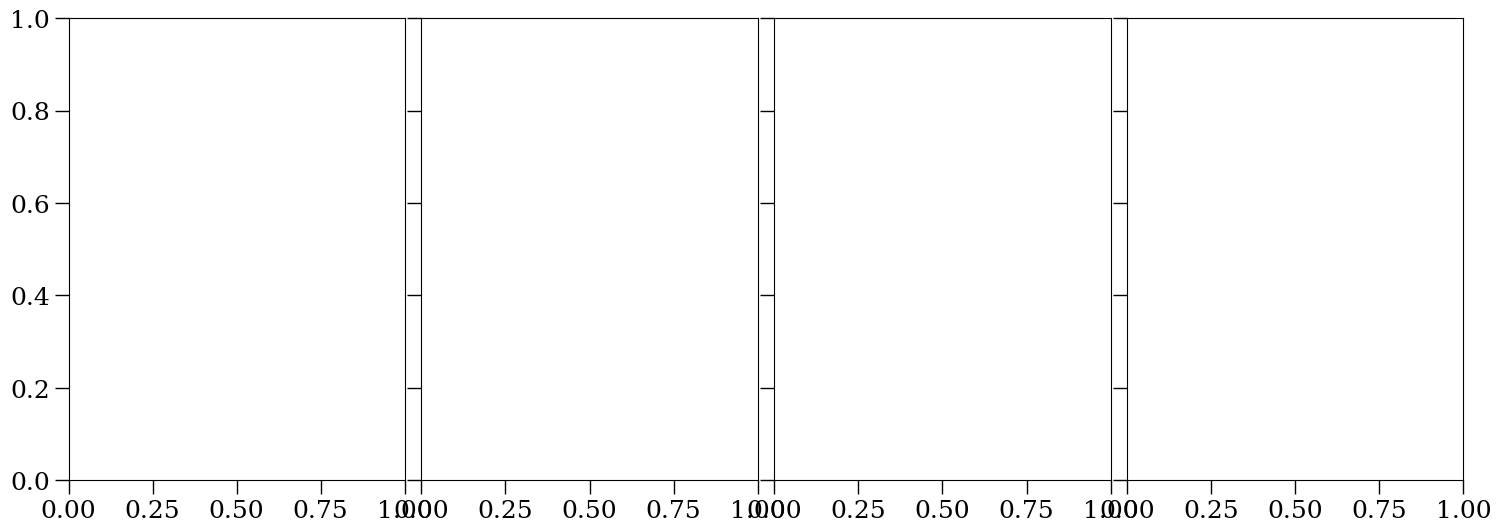

In [ ]:
%%time
alphas = [0.5, 1., 1.5, 2.]
beta = np.linspace(1.5, 10, 10)
mrs = np.logspace(-7, -2, 10)
xscale = 20
tscale = 6.e5
cmap = logmpeak_cmap
vmin = 10.
vmax = 300.

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = np.log10(mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, mmin=vmin))
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=1, vmax=2.5)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    
axes[0].set_xlim(1.5, 5)
axes[0].set_ylim(1e-7, 1e-2)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=1, vmax=2.5), cmap=mpeak_cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\log M_\\mathrm{peak}/\\mathrm{M}_\\odot$')

CPU times: user 16.8 s, sys: 7.99 ms, total: 16.8 s
Wall time: 16.8 s


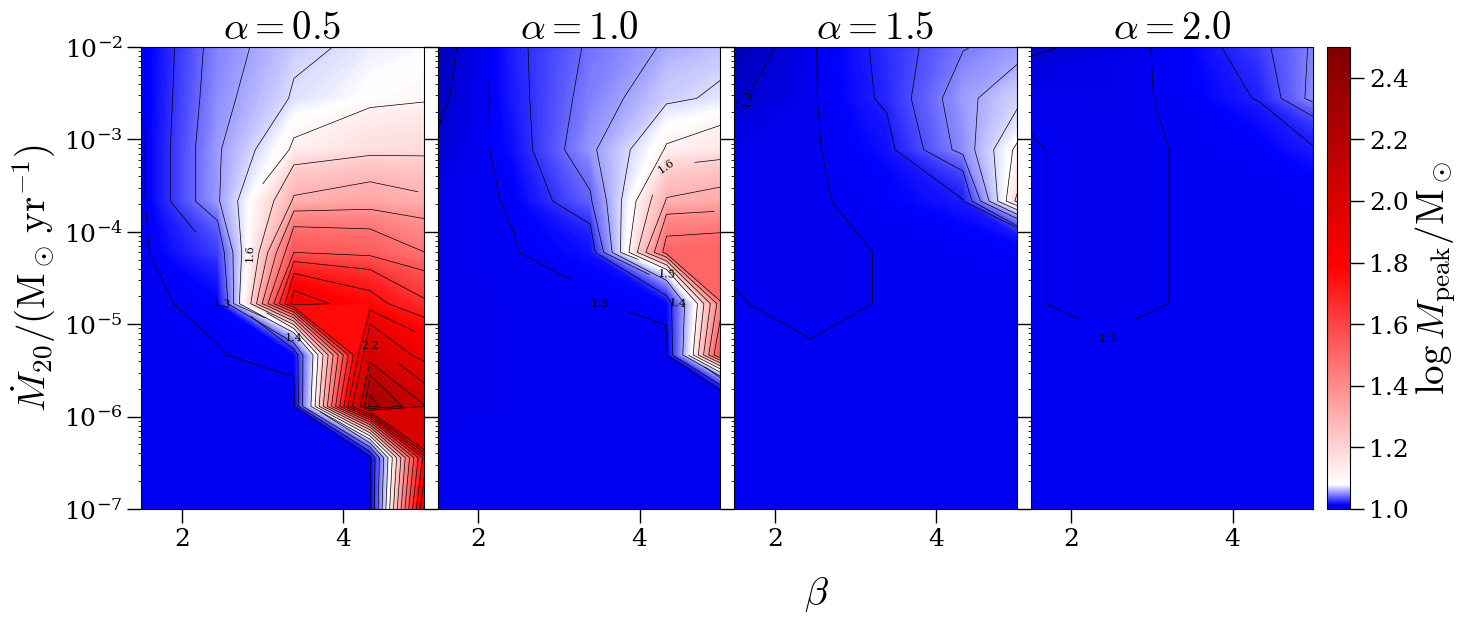

In [ ]:
%%time
alphas = [0.5, 1., 1.5, 2.]
beta = np.linspace(1.5, 10, 10)
mrs = np.logspace(-7, -2, 10)
xscale = 20
tscale = 6.e5
cmap = logmpeak_cmap
vmin = 10.
vmax = 300.

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = np.log10(mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, mmin=vmin))
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=1, vmax=2.5)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    
axes[0].set_xlim(1.5, 5)
axes[0].set_ylim(1e-7, 1e-2)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=1, vmax=2.5), cmap=mpeak_cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\log M_\\mathrm{peak}/\\mathrm{M}_\\odot$')

CPU times: user 16.9 s, sys: 4 ms, total: 16.9 s
Wall time: 16.9 s


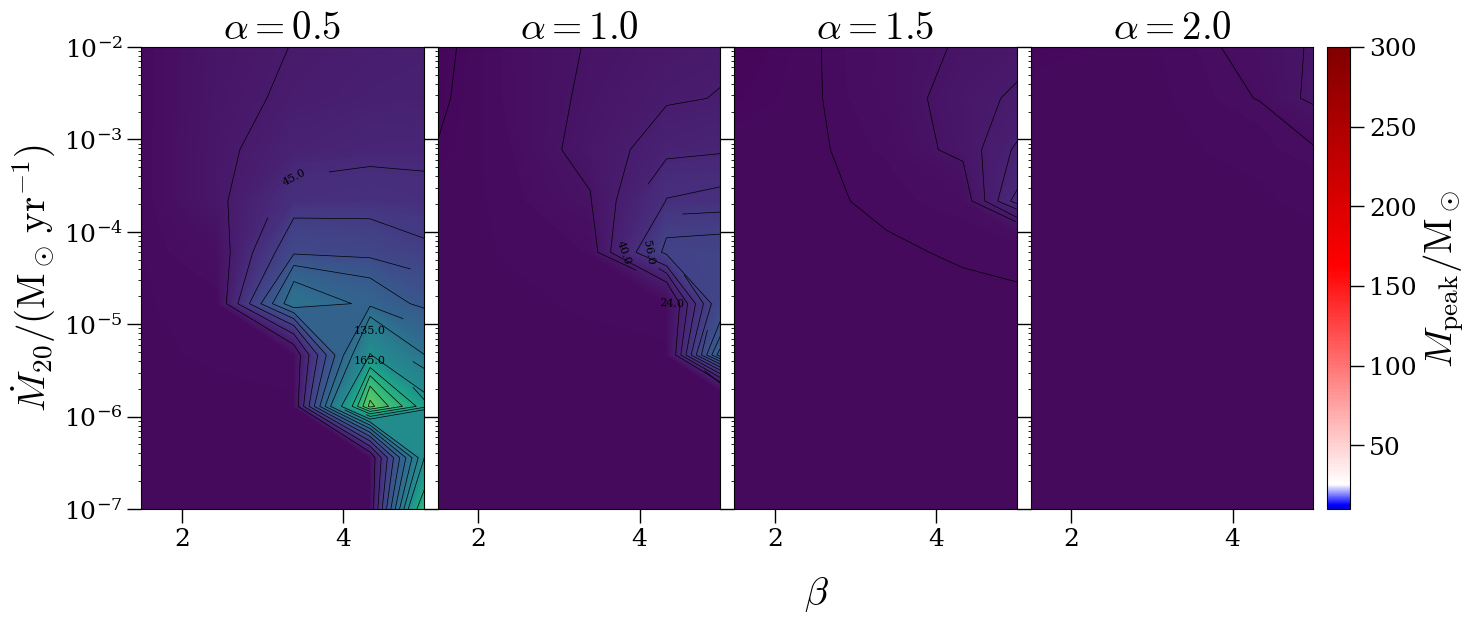

In [ ]:
%%time
alphas = [0.5, 1., 1.5, 2.]
beta = np.linspace(1.5, 10, 10)
mrs = np.logspace(-7, -2, 10)
xscale = 20
tscale = 6.e5
cmap = mpeak_cmap
vmin = 10.
vmax = 300.

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale, mmin=vmin)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    
axes[0].set_xlim(1.5, 5)
axes[0].set_ylim(1e-7, 1e-2)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=mpeak_cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')

CPU times: user 27min 21s, sys: 778 ms, total: 27min 22s
Wall time: 27min 22s


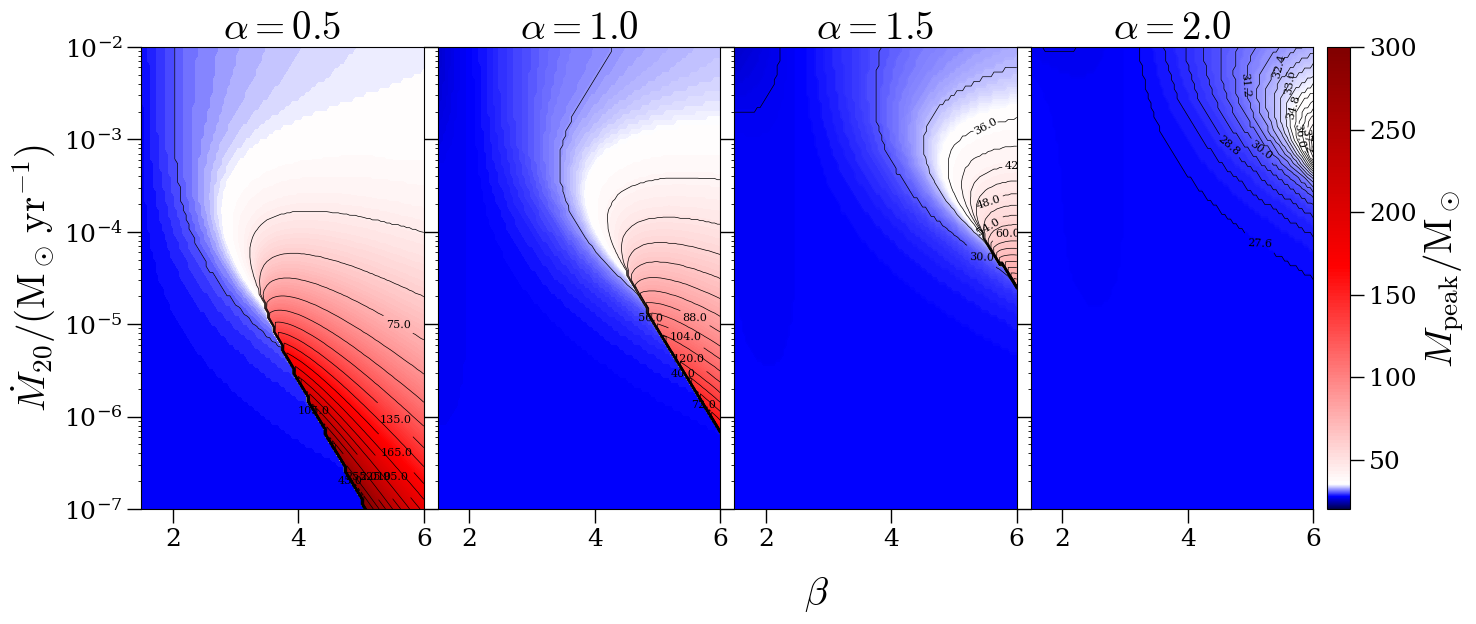

In [ ]:
%%time
alphas = [0.5, 1., 1.5, 2.]
beta = np.linspace(1.5, 6, 100)
mrs = np.logspace(-7, -2, 100)
xscale = 20
tscale = 6.e5
cmap = mpeak_cmap
vmin = 20.
vmax = 300.

BETA, MR = np.meshgrid(beta, mrs)

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(alphas)):
    ax = axes[i]
    alpha = alphas[i]
    MPEAK = mpeak2(MR, alpha, BETA, xscale=xscale, tscale=tscale)
    contour = ax.contourf(BETA, MR, MPEAK, levels=500, cmap=cmap, vmin=vmin, vmax=vmax)
    contour_lines = ax.contour(BETA, MR, MPEAK, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\alpha={alpha}$')
    
axes[0].set_xlim(1.5, 6)
axes[0].set_ylim(1e-7, 1e-2)
axes[0].set_ylabel('$\\dot{M}_{20}/(\\mathrm{M}_\\odot\\,\\mathrm{yr}^{-1})$')
axes[0].set_yscale('log')
fig.text(0.5, 0, '$\\beta$', ha='center', va='top', transform=fig.transFigure)

sm = cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax), cmap=mpeak_cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$M_\\mathrm{peak}/\\mathrm{M}_\\odot$')

In [ ]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1+nu
max_mu = 5+nu

a_list = 10.**np.arange(-10, -6, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = mider_mf(X, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(X/plot_xscale, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(X/plot_xscale, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$', fontsize=16)

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$\\mathrm{d} m_f/\\mathrm[d} m_i$')
fig.text(0.5, 0, '$m_i$', ha='center', va='top', transform=fig.transFigure)
ax.set_xlim(1, 15)
#ax.set_ylim(0,1)

#ax.set_yscale('log')

(1.0, 15.0)

Error in callback <function _draw_all_if_interactive at 0x15551d06f9a0> (for post_execute):


ValueError: 
\mathrm{d} m_f/\mathrm[d} m_i
               ^
ParseFatalException: Unknown symbol: \mathrm, found '\'  (at char 15), (line:1, col:16)

ValueError: 
\mathrm{d} m_f/\mathrm[d} m_i
               ^
ParseFatalException: Unknown symbol: \mathrm, found '\'  (at char 15), (line:1, col:16)

<Figure size 1800x600 with 5 Axes>

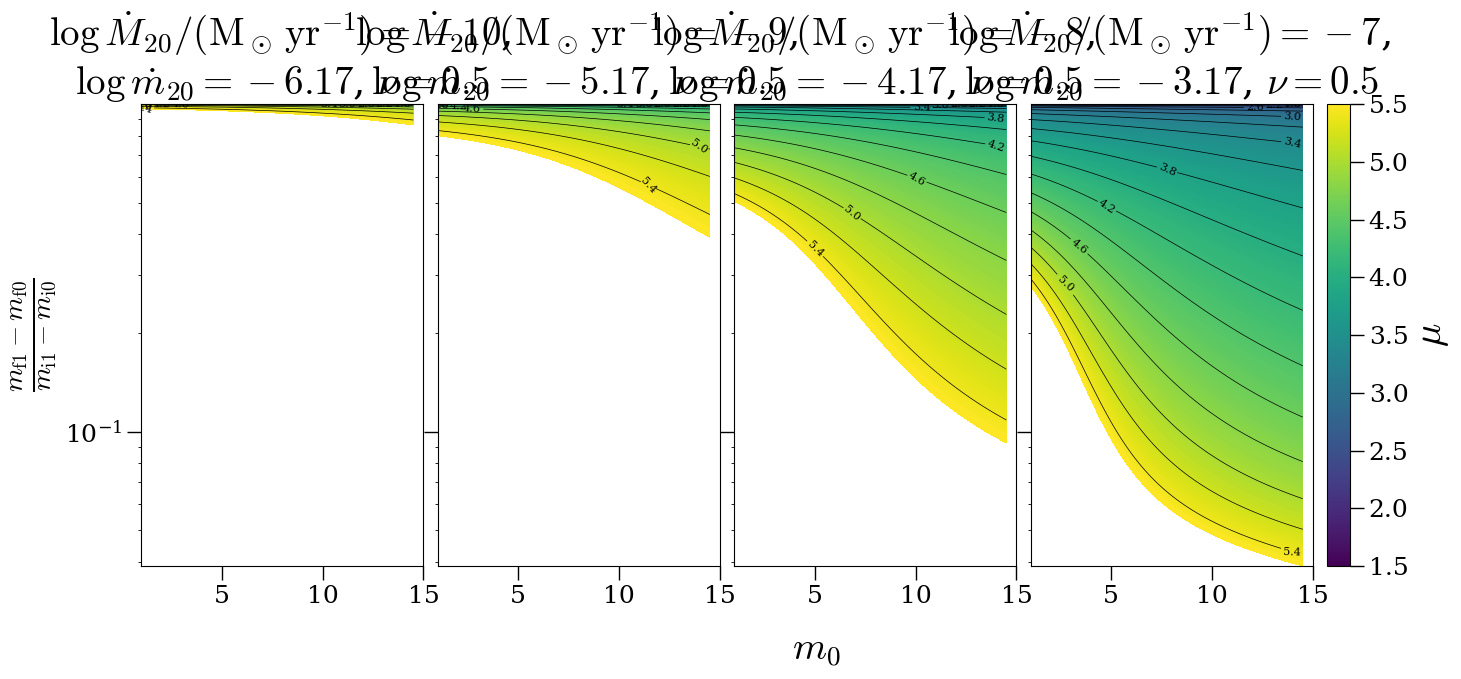

In [ ]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1+nu
max_mu = 5+nu

a_list = 10.**np.arange(-10, -6, 1)
x = np.linspace(20, 290, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = rel_width(X, 300, a, nu, MU, xscale=xscale, tscale=tscale)
    contour = ax.contourf(X/plot_xscale, Y1, MU, levels=200, cmap=cmap)#, vmin=min_mu, vmax=max_mu)
    contour_lines = ax.contour(X/plot_xscale, Y1, MU, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$')

sm = cm.ScalarMappable(Normalize(vmin=min_mu, vmax=max_mu), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$\\mu$')

axes[0].set_ylabel('$\\frac{m_{\mathrm{f}1}-m_{\mathrm{f}0}}{m_{\mathrm{i}1}-m_{\mathrm{i}0}}$')
fig.text(0.5, 0, '$m_\\mathrm{0}$', ha='center', va='top', transform=fig.transFigure)
ax.set_xlim(1, 15)
#ax.set_ylim(0,1)

ax.set_yscale('log')

Text(0.5, 0, '$m_\\mathrm{i}$')

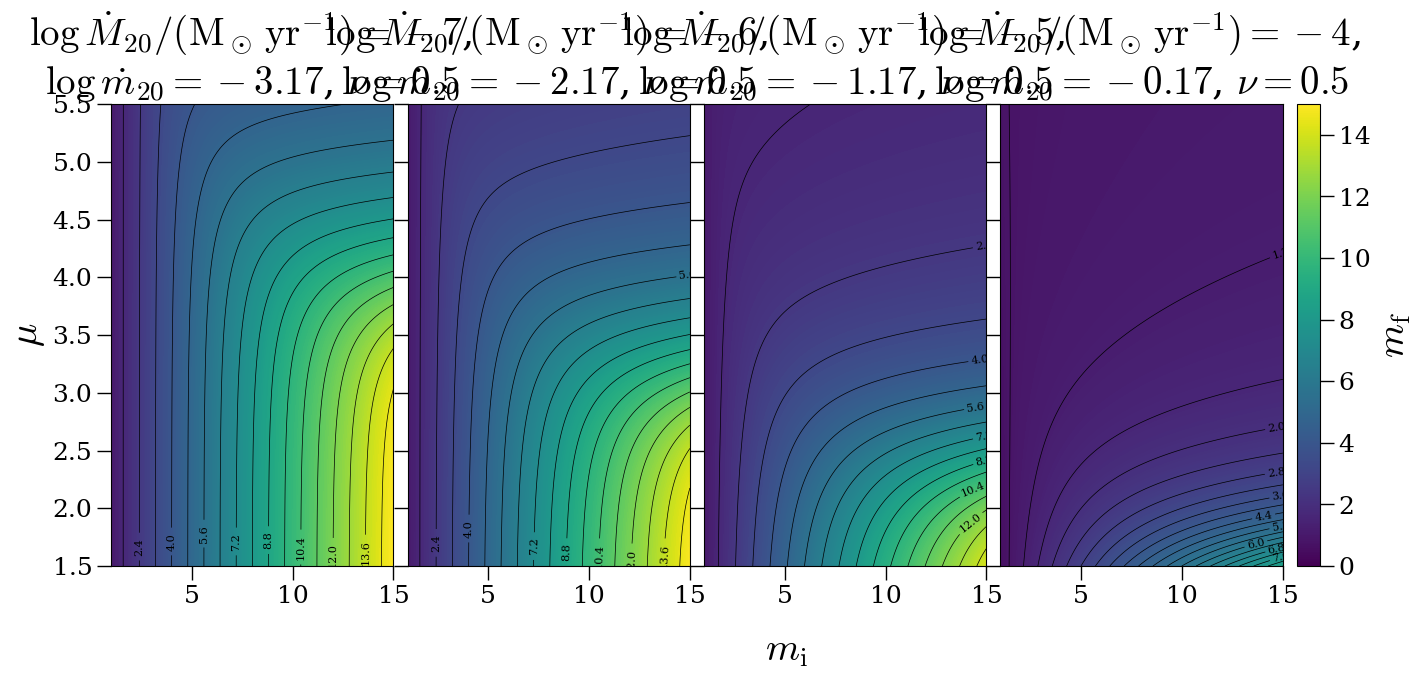

In [ ]:
nu = 0.5
xscale = 20
tscale = 6.e5
plot_w_scale = True
if plot_w_scale:
    plot_xscale = xscale
else:
    plot_xscale = 1

# a is the mass loss rate for m = xscale
min_mu = 1+nu
max_mu = 5+nu

a_list = 10.**np.arange(-7, -3, 1)
x = np.linspace(20, 300, 1000)
mu = np.linspace(min_mu, max_mu, 1000)
X, MU = np.meshgrid(x, mu)
ymin = 0
ymax = 300
cmap = cm.viridis

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in range(len(a_list)):
    ax = axes[i]
    a = a_list[i]
    Y1 = y1(X, a, MU, nu, xscale=xscale, tscale=tscale)/plot_xscale
    contour = ax.contourf(X/plot_xscale, MU, Y1, levels=200, cmap=cmap, vmin=ymin/plot_xscale, vmax=ymax/plot_xscale)
    contour_lines = ax.contour(X/plot_xscale, MU, Y1, levels=20, colors='black', linewidths=0.5)
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f", levels=contour_lines.levels[::2])
    ax.set_title(f'$\\log\\dot{{M}}_{{20}}/(\\mathrm{{M}}_\\odot\\,\\mathrm{{yr}}^{{-1}})={np.log10(a):.0f}$, \n$\\log\\dot{{m}}_{{20}}={np.log10(a/(xscale/(tscale*xscale**-nu))):.2f}$, $\\nu={nu}$')
    ax.set_xlim(20/plot_xscale, 300/plot_xscale)
    #ax.hlines(nu, 20/plot_xscale, 300/plot_xscale, color='red', linestyle='--', lw=1)
    #ax.text(20/plot_xscale, nu, '$\\nu$', color='red', fontsize=14, ha='left', va='top')

sm = cm.ScalarMappable(Normalize(vmin=ymin/plot_xscale, vmax=ymax/plot_xscale), cmap=cmap)
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.01)
cbar.set_label('$m_\\mathrm{f}$')

axes[0].set_ylabel('$\mu$')
fig.text(0.5, 0, '$m_\\mathrm{i}$', ha='center', va='top', transform=fig.transFigure)